In [1]:
import pandas as pd
import glob
import tensorflow as tf
from tensorflow.data import Dataset
from matplotlib import pyplot
from tensorflow.keras.callbacks import TensorBoard
import numpy as np

2021-10-20 17:59:30.827586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-20 17:59:30.827693: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [20]:
path =r'../data/datasets_by_year/'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    df = pd.read_csv(filename).drop(columns=["Unnamed: 0", "individual-local-identifier"])
    if df.shape > (40,):
        dfs.append(tf.convert_to_tensor(df[["location-long", "location-lat"]].to_numpy()))

In [22]:
dfs

[<tf.Tensor: shape=(90, 2), dtype=float64, numpy=
 array([[-120.582,   34.424],
        [-121.303,   34.44 ],
        [-119.969,   34.093],
        [-120.168,   34.134],
        [-120.614,   34.072],
        [-120.761,   34.059],
        [-120.671,   34.075],
        [-120.419,   34.438],
        [-121.024,   33.91 ],
        [-120.668,   34.196],
        [-120.801,   34.138],
        [-120.472,   33.725],
        [-120.392,   33.694],
        [-120.815,   33.851],
        [-120.646,   33.834],
        [-120.955,   33.914],
        [-120.574,   33.978],
        [-120.491,   33.8  ],
        [-120.751,   33.694],
        [-118.223,   33.109],
        [-120.482,   34.114],
        [-120.392,   33.856],
        [-120.343,   33.438],
        [-120.38 ,   33.385],
        [-120.802,   33.225],
        [-120.471,   33.486],
        [-120.291,   33.472],
        [-120.343,   33.333],
        [-120.059,   33.339],
        [-120.012,   33.316],
        [-119.578,   32.986],
        [-119.679,  

In [68]:
val_df

,location-long,location-lat,argos:lat1,argos:lat2,argos:lon1,argos:lon2
224,-93.144,9.374,9.374,8.480,-93.144,-97.722
225,-92.872,9.145,9.145,13.101,-92.872,-75.804
226,-93.237,9.187,9.187,13.420,-93.237,-111.554
227,-93.270,9.106,9.106,10.304,-93.270,-98.670
228,-93.277,9.115,9.115,12.151,-93.277,-106.615
...,...,...,...,...,...,...
283,-90.338,9.035,9.035,12.174,-90.338,-103.826
284,-90.417,9.043,9.043,12.983,-90.417,-107.117
285,-91.290,9.181,9.181,10.500,-91.290,-84.704
286,-90.384,8.947,8.947,10.800,-90.384,-82.410


In [4]:
split_data_result = [split_data(df) for df in dfs]

In [3]:
def split_data(df):

    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]

    num_features = df.shape[1]
    
    return train_df, val_df,test_df

In [5]:
def data_windowing(train_df,val_df,test_df):
    n_points = 20
    window_length = n_points+ 1 
    
    window_train = tf.keras.utils.timeseries_dataset_from_array(
    train_df, targets=None,sequence_length = window_length, sequence_stride=1, sampling_rate=1,
    batch_size=32, shuffle=False, seed=None, start_index=None, end_index=None)
    
    window_test = tf.keras.utils.timeseries_dataset_from_array(
    test_df, targets=None,sequence_length = window_length, sequence_stride=1, sampling_rate=1,
    batch_size=32, shuffle=False, seed=None, start_index=None, end_index=None)
        
    window_val = tf.keras.utils.timeseries_dataset_from_array(
    val_df, targets=None,sequence_length = window_length, sequence_stride=1, sampling_rate=1,
    batch_size=32, shuffle=False, seed=None, start_index=None, end_index=None)
    
    return window_train, window_test, window_val

In [59]:
a,b,c = data_windowing(train_df,val_df,test_df)

In [62]:
a,b,c = [i.map(data_map) for i in [a,b,c]]



In [65]:
len(list(a))

7

In [69]:
val_df.shape

(64, 6)

In [70]:
train_df.shape

(224, 6)

In [72]:
list(a)[-1]

(<tf.Tensor: shape=(12, 20, 6), dtype=float64, numpy=
 array([[[ -91.884,    9.057,    9.057,    7.012,  -91.884, -101.178],
         [ -92.258,    8.827,    8.827,   10.522,  -92.258,  -85.016],
         [ -92.276,    8.749,    8.749,   13.841,  -92.276, -114.431],
         ...,
         [ -93.149,    8.775,    8.775,    7.59 ,  -93.149,  -98.189],
         [ -93.139,    8.761,    8.761,   10.38 ,  -93.139,  -85.817],
         [ -93.578,    8.828,    8.828,    9.417,  -93.578,  -96.24 ]],
 
        [[ -92.258,    8.827,    8.827,   10.522,  -92.258,  -85.016],
         [ -92.276,    8.749,    8.749,   13.841,  -92.276, -114.431],
         [ -92.262,    8.789,    8.789,   10.227,  -92.262,  -98.364],
         ...,
         [ -93.139,    8.761,    8.761,   10.38 ,  -93.139,  -85.817],
         [ -93.578,    8.828,    8.828,    9.417,  -93.578,  -96.24 ],
         [ -93.56 ,    8.827,    8.827,   12.96 ,  -93.56 , -111.188]],
 
        [[ -92.276,    8.749,    8.749,   13.841,  -92.276, 

In [67]:
list(b)

[(<tf.Tensor: shape=(13, 20, 6), dtype=float64, numpy=
  array([[[ -90.198,    8.874,    8.874,   12.859,  -90.198, -107.986],
          [ -91.166,    9.138,    9.138,   13.133,  -91.166,  -73.383],
          [ -91.269,    9.493,    9.493,   16.262,  -91.269, -121.007],
          ...,
          [ -94.008,   11.03 ,   11.03 ,   16.139,  -94.008, -116.095],
          [ -94.105,   11.042,   11.042,    9.389,  -94.105,  -86.781],
          [ -94.114,   11.042,   11.042,   14.241,  -94.114, -107.948]],
  
         [[ -91.166,    9.138,    9.138,   13.133,  -91.166,  -73.383],
          [ -91.269,    9.493,    9.493,   16.262,  -91.269, -121.007],
          [ -89.975,    9.843,    9.843,   14.043,  -89.975, -109.628],
          ...,
          [ -94.105,   11.042,   11.042,    9.389,  -94.105,  -86.781],
          [ -94.114,   11.042,   11.042,   14.241,  -94.114, -107.948],
          [ -94.473,   11.125,   11.125,   10.159,  -94.473,  -98.738]],
  
         [[ -91.269,    9.493,    9.493,   

In [ ]:
len()

In [6]:
def data_map(elem):
    n_points = 20
    window_length = n_points+ 1 
    X,y = elem[:,:-1,:],elem[:,-1:,0:2]
    X.set_shape([None, n_points, None])
    y.set_shape([None, window_length - n_points, None])
    
    return X,y


In [7]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=2)
])

2021-10-20 17:13:14.384291: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-20 17:13:14.384383: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-20 17:13:14.384408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-R3AGIN3): /proc/driver/nvidia/version does not exist
2021-10-20 17:13:14.384730: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
lstm_model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

In [76]:
len(split_data_result)

82

In [9]:
hist_df = pd.DataFrame(columns=["loss", "val_loss", "mean_absolute_error", "val_mean_absolute_error"])
for i, (train_df,val_df,test_df) in enumerate(split_data_result):
    
    #print(i,len(split_data_result))
    
    window_train,window_val,window_test = data_windowing(train_df,val_df,test_df)
    train = window_train.map(data_map)
    test = window_test.map(data_map)
    val = window_val.map(data_map)
    
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    patience=2,
                                                    mode='min')
    
    tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=2)
    
    history = lstm_model.fit(train, epochs=20,
                             validation_data=val,
                             callbacks=[tensorboard_callback])
    
    history_step = []
    
    for i in range(len(history.history["loss"])):
        history_step.append({
            "loss": history.history["loss"][i],
            "mean_absolute_error": history.history["mean_absolute_error"][i],
            "val_loss": history.history.get("val_loss", [np.nan for _ in range(i+1)])[i],
            "val_mean_absolute_error": history.history.get("val_mean_absolute_error", [np.nan for _ in range(i+1)])[i]
            
        })
    
    hist_df = hist_df.append(pd.DataFrame(history_step))


2021-10-20 17:13:15.528156: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:15.528197: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:15.528244: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:15.549936: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
2/2 [==============================] - 2s 197ms/step - loss: 7404.0654 - mean_absolute_error: 74.2128


2021-10-20 17:13:17.007139: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:17.007183: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:17.025100: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:17.031249: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:17.062868: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_17

2021-10-20 17:13:17.076624: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_17/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:13:17.087743: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_17

2021-10-20 17:13:17.

Epoch 2/20
2/2 [==============================] - 0s 65ms/step - loss: 7395.1851 - mean_absolute_error: 74.1570
Epoch 3/20
2/2 [==============================] - 0s 57ms/step - loss: 7384.8452 - mean_absolute_error: 74.0966
Epoch 4/20
2/2 [==============================] - 0s 51ms/step - loss: 7374.1519 - mean_absolute_error: 74.0349
Epoch 5/20
2/2 [==============================] - ETA: 0s - loss: 7480.3188 - mean_absolute_error: 74.752 - 0s 52ms/step - loss: 7364.8989 - mean_absolute_error: 73.9799
Epoch 6/20
2/2 [==============================] - 0s 51ms/step - loss: 7357.3647 - mean_absolute_error: 73.9359
Epoch 7/20
2/2 [==============================] - ETA: 0s - loss: 7466.1846 - mean_absolute_error: 74.675 - 0s 53ms/step - loss: 7350.0342 - mean_absolute_error: 73.8982
Epoch 8/20
2/2 [==============================] - 0s 53ms/step - loss: 7340.7231 - mean_absolute_error: 73.8574
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 7327.7729 - mean_absolute_err

2021-10-20 17:13:19.174559: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:19.174602: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:19.174643: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:19.356811: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:19.356872: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:19.375854: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.


1/1 [==============================] - 0s 128ms/step - loss: 7486.8726 - mean_absolute_error: 75.2470
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 7484.9688 - mean_absolute_error: 75.2350


2021-10-20 17:13:19.379899: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:19.403946: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_19

2021-10-20 17:13:19.412564: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_19/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:13:19.423593: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_19

2021-10-20 17:13:19.427844: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_19/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:13:19.445676: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: ./logs/train/plugins/p

Epoch 4/20
1/1 [==============================] - 0s 56ms/step - loss: 7483.0298 - mean_absolute_error: 75.2227
Epoch 5/20
1/1 [==============================] - 0s 61ms/step - loss: 7481.0068 - mean_absolute_error: 75.2098
Epoch 6/20
1/1 [==============================] - 0s 54ms/step - loss: 7478.8271 - mean_absolute_error: 75.1960
Epoch 7/20
1/1 [==============================] - 0s 55ms/step - loss: 7476.3843 - mean_absolute_error: 75.1806
Epoch 8/20
1/1 [==============================] - 0s 53ms/step - loss: 7473.5342 - mean_absolute_error: 75.1627
Epoch 9/20
1/1 [==============================] - 0s 54ms/step - loss: 7470.1064 - mean_absolute_error: 75.1414
Epoch 10/20
1/1 [==============================] - 0s 56ms/step - loss: 7465.9312 - mean_absolute_error: 75.1157
Epoch 11/20
1/1 [==============================] - 0s 65ms/step - loss: 7460.8643 - mean_absolute_error: 75.0850
Epoch 12/20
1/1 [==============================] - 0s 57ms/step - loss: 7454.7646 - mean_absolute_erro

2021-10-20 17:13:21.372779: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:21.372827: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:21.372861: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


1/1 [==============================] - 0s 152ms/step - loss: 7483.9546 - mean_absolute_error: 74.9724
Epoch 2/20
1/1 [==============================] - 0s 163ms/step - loss: 7479.0361 - mean_absolute_error: 74.9425
Epoch 3/20


2021-10-20 17:13:21.659648: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:21.659687: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:21.686843: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:21.690198: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:21.720262: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_21

2021-10-20 17:13:21.729450: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_21/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:13:21.740849: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_21

2021-10-20 17:13:21.

1/1 [==============================] - 0s 89ms/step - loss: 7474.6045 - mean_absolute_error: 74.9152
Epoch 4/20
1/1 [==============================] - 0s 72ms/step - loss: 7470.6069 - mean_absolute_error: 74.8903
Epoch 5/20
1/1 [==============================] - 0s 78ms/step - loss: 7466.9639 - mean_absolute_error: 74.8673
Epoch 6/20
1/1 [==============================] - 0s 75ms/step - loss: 7463.5952 - mean_absolute_error: 74.8460
Epoch 7/20
1/1 [==============================] - 0s 67ms/step - loss: 7460.4399 - mean_absolute_error: 74.8259
Epoch 8/20
1/1 [==============================] - 0s 63ms/step - loss: 7457.4697 - mean_absolute_error: 74.8068
Epoch 9/20
1/1 [==============================] - 0s 88ms/step - loss: 7454.6626 - mean_absolute_error: 74.7888
Epoch 10/20
1/1 [==============================] - 0s 65ms/step - loss: 7451.9951 - mean_absolute_error: 74.7715
Epoch 11/20
1/1 [==============================] - 0s 54ms/step - loss: 7449.4390 - mean_absolute_error: 74.7550
E

2021-10-20 17:13:23.702282: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:23.702337: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:23.702370: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:23.895362: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:23.895400: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 118ms/step - loss: 6821.3188 - mean_absolute_error: 70.7697
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 6819.0640 - mean_absolute_error: 70.7537


2021-10-20 17:13:23.912217: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:23.915592: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:23.939205: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_23

2021-10-20 17:13:23.948365: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_23/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:13:23.955902: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_23

2021-10-20 17:13:23.958771: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_23/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 55ms/step - loss: 6816.5674 - mean_absolute_error: 70.7358
Epoch 5/20
1/1 [==============================] - 0s 60ms/step - loss: 6813.7319 - mean_absolute_error: 70.7152
Epoch 6/20
1/1 [==============================] - 0s 54ms/step - loss: 6810.5439 - mean_absolute_error: 70.6919
Epoch 7/20
1/1 [==============================] - 0s 60ms/step - loss: 6807.1475 - mean_absolute_error: 70.6670
Epoch 8/20
1/1 [==============================] - 0s 54ms/step - loss: 6803.8579 - mean_absolute_error: 70.6429
Epoch 9/20
1/1 [==============================] - 0s 61ms/step - loss: 6800.8452 - mean_absolute_error: 70.6210
Epoch 10/20
1/1 [==============================] - 0s 53ms/step - loss: 6798.1670 - mean_absolute_error: 70.6017
Epoch 11/20
1/1 [==============================] - 0s 59ms/step - loss: 6795.7646 - mean_absolute_error: 70.5845
Epoch 12/20
1/1 [==============================] - 0s 55ms/step - loss: 6793.5767 - mean_absolute_erro

2021-10-20 17:13:25.672118: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:25.672162: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:25.672194: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:25.777819: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:25.777863: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:25.790930: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:25.792978: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:25.811677: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_25

2021-10-20 17:13:25.817700: I tensorflow/core/profil

3/3 [==============================] - 0s 82ms/step - loss: 6738.1519 - mean_absolute_error: 69.8480
Epoch 2/20
3/3 [==============================] - 0s 32ms/step - loss: 6732.6948 - mean_absolute_error: 69.8096
Epoch 3/20
3/3 [==============================] - 0s 30ms/step - loss: 6727.2969 - mean_absolute_error: 69.7717
Epoch 4/20
3/3 [==============================] - 0s 30ms/step - loss: 6721.9478 - mean_absolute_error: 69.7343
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 6716.6387 - mean_absolute_error: 69.6972
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 6711.3638 - mean_absolute_error: 69.6604
Epoch 7/20
3/3 [==============================] - 0s 31ms/step - loss: 6706.1211 - mean_absolute_error: 69.6237
Epoch 8/20
3/3 [==============================] - 0s 30ms/step - loss: 6700.9033 - mean_absolute_error: 69.5873
Epoch 9/20
3/3 [==============================] - 0s 30ms/step - loss: 6695.7090 - mean_absolute_error: 69.5511
Epo

2021-10-20 17:13:28.018635: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:28.018677: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:28.018708: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:28.197981: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:28.198020: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:28.214033: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:28.217500: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


1/1 [==============================] - 0s 121ms/step - loss: 7101.6987 - mean_absolute_error: 72.4043
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 7098.8652 - mean_absolute_error: 72.3855


2021-10-20 17:13:28.240095: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_28

2021-10-20 17:13:28.249340: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_28/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:13:28.258374: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_28

2021-10-20 17:13:28.261205: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_28/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:13:28.280757: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_28
Dumped tool data for xplane.pb to ./logs/train/plugins/profile/2021_10_20_17_13_28/DE

Epoch 4/20
1/1 [==============================] - 0s 54ms/step - loss: 7096.2109 - mean_absolute_error: 72.3677
Epoch 5/20
1/1 [==============================] - 0s 61ms/step - loss: 7093.6245 - mean_absolute_error: 72.3501
Epoch 6/20
1/1 [==============================] - 0s 54ms/step - loss: 7091.0596 - mean_absolute_error: 72.3326
Epoch 7/20
1/1 [==============================] - 0s 59ms/step - loss: 7088.5044 - mean_absolute_error: 72.3151
Epoch 8/20
1/1 [==============================] - 0s 55ms/step - loss: 7085.9502 - mean_absolute_error: 72.2975
Epoch 9/20
1/1 [==============================] - 0s 57ms/step - loss: 7083.3984 - mean_absolute_error: 72.2800
Epoch 10/20
1/1 [==============================] - 0s 56ms/step - loss: 7080.8472 - mean_absolute_error: 72.2624
Epoch 11/20
1/1 [==============================] - 0s 55ms/step - loss: 7078.2993 - mean_absolute_error: 72.2448
Epoch 12/20
1/1 [==============================] - 0s 55ms/step - loss: 7075.7544 - mean_absolute_erro

2021-10-20 17:13:30.002704: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:30.002751: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:30.002782: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:30.110631: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:30.110672: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:30.127633: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:30.130076: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:30.149620: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_30

2021-10-20 17:13:30.156055: I tensorflow/core/profil

3/3 [==============================] - 0s 86ms/step - loss: 6366.6260 - mean_absolute_error: 66.7290
Epoch 2/20
3/3 [==============================] - 0s 30ms/step - loss: 6359.8535 - mean_absolute_error: 66.6786
Epoch 3/20
3/3 [==============================] - 0s 31ms/step - loss: 6353.2422 - mean_absolute_error: 66.6300
Epoch 4/20
3/3 [==============================] - 0s 30ms/step - loss: 6346.7588 - mean_absolute_error: 66.5827
Epoch 5/20
3/3 [==============================] - 0s 32ms/step - loss: 6340.3813 - mean_absolute_error: 66.5364
Epoch 6/20
3/3 [==============================] - 0s 31ms/step - loss: 6334.0898 - mean_absolute_error: 66.4909
Epoch 7/20
3/3 [==============================] - 0s 31ms/step - loss: 6327.8701 - mean_absolute_error: 66.4460
Epoch 8/20
3/3 [==============================] - 0s 30ms/step - loss: 6321.7104 - mean_absolute_error: 66.4016
Epoch 9/20
3/3 [==============================] - 0s 29ms/step - loss: 6315.6025 - mean_absolute_error: 66.3576
Epo

2021-10-20 17:13:32.479107: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:32.479149: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:32.479181: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:32.586309: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:32.586353: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:32.597696: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:32.599157: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:32.615466: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_32

2021-10-20 17:13:32.619906: I tensorflow/core/profil

2/2 [==============================] - 0s 147ms/step - loss: 7110.9326 - mean_absolute_error: 72.9050
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 7104.9849 - mean_absolute_error: 72.8650
Epoch 3/20
2/2 [==============================] - 0s 50ms/step - loss: 7098.9419 - mean_absolute_error: 72.8241
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 7092.8320 - mean_absolute_error: 72.7823
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 7086.6855 - mean_absolute_error: 72.7400
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 7080.5225 - mean_absolute_error: 72.6973
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 7074.3599 - mean_absolute_error: 72.6545
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 7068.2095 - mean_absolute_error: 72.6116
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 7062.0791 - mean_absolute_error: 72.5687
Ep

2021-10-20 17:13:34.742159: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:34.742203: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:34.742247: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:34.928224: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:34.928380: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 132ms/step - loss: 6593.8418 - mean_absolute_error: 68.9604
Epoch 3/20
1/1 [==============================] - 0s 56ms/step - loss: 6591.1392 - mean_absolute_error: 68.9405


2021-10-20 17:13:34.946366: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:34.950372: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:34.974125: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_34

2021-10-20 17:13:34.985072: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_34/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:13:34.995764: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_34

2021-10-20 17:13:34.999577: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_34/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 59ms/step - loss: 6588.4546 - mean_absolute_error: 68.9208
Epoch 5/20
1/1 [==============================] - 0s 81ms/step - loss: 6585.7827 - mean_absolute_error: 68.9012
Epoch 6/20
1/1 [==============================] - 0s 54ms/step - loss: 6583.1230 - mean_absolute_error: 68.8818
Epoch 7/20
1/1 [==============================] - 0s 57ms/step - loss: 6580.4761 - mean_absolute_error: 68.8624
Epoch 8/20
1/1 [==============================] - 0s 56ms/step - loss: 6577.8418 - mean_absolute_error: 68.8432
Epoch 9/20
1/1 [==============================] - 0s 66ms/step - loss: 6575.2173 - mean_absolute_error: 68.8241
Epoch 10/20
1/1 [==============================] - 0s 62ms/step - loss: 6572.6040 - mean_absolute_error: 68.8051
Epoch 11/20
1/1 [==============================] - 0s 82ms/step - loss: 6570.0015 - mean_absolute_error: 68.7862
Epoch 12/20
1/1 [==============================] - 0s 57ms/step - loss: 6567.4077 - mean_absolute_erro

2021-10-20 17:13:36.921501: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:36.921546: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:36.921579: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:37.025062: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:37.025108: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:37.040766: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:37.042906: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:37.061540: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_37

2021-10-20 17:13:37.069828: I tensorflow/core/profil

4/4 [==============================] - 0s 70ms/step - loss: 6307.7124 - mean_absolute_error: 66.5596
Epoch 2/20
4/4 [==============================] - 0s 37ms/step - loss: 6297.9341 - mean_absolute_error: 66.4874
Epoch 3/20
4/4 [==============================] - 0s 26ms/step - loss: 6288.3691 - mean_absolute_error: 66.4173
Epoch 4/20
4/4 [==============================] - 0s 27ms/step - loss: 6278.7837 - mean_absolute_error: 66.3473
Epoch 5/20
4/4 [==============================] - 0s 23ms/step - loss: 6268.4521 - mean_absolute_error: 66.2707
Epoch 6/20
4/4 [==============================] - 0s 25ms/step - loss: 6259.1035 - mean_absolute_error: 66.2029
Epoch 7/20
4/4 [==============================] - 0s 25ms/step - loss: 6249.9585 - mean_absolute_error: 66.1367
Epoch 8/20
4/4 [==============================] - 0s 23ms/step - loss: 6240.8682 - mean_absolute_error: 66.0710
Epoch 9/20
4/4 [==============================] - 0s 24ms/step - loss: 6231.8257 - mean_absolute_error: 66.0056
Epo

2021-10-20 17:13:39.758641: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:39.758700: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:39.758749: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:39.867222: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:39.867268: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:39.880642: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:39.882767: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:39.903077: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_39

2021-10-20 17:13:39.911544: I tensorflow/core/profil

4/4 [==============================] - 0s 60ms/step - loss: 7091.1729 - mean_absolute_error: 72.4917
Epoch 2/20
4/4 [==============================] - 0s 23ms/step - loss: 7081.4355 - mean_absolute_error: 72.4261
Epoch 3/20
4/4 [==============================] - 0s 24ms/step - loss: 7071.4985 - mean_absolute_error: 72.3581
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 7061.4482 - mean_absolute_error: 72.2886
Epoch 5/20
4/4 [==============================] - 0s 32ms/step - loss: 7051.3394 - mean_absolute_error: 72.2183
Epoch 6/20
4/4 [==============================] - 0s 37ms/step - loss: 7041.2070 - mean_absolute_error: 72.1476
Epoch 7/20
4/4 [==============================] - 0s 33ms/step - loss: 7031.0728 - mean_absolute_error: 72.0767
Epoch 8/20
4/4 [==============================] - 0s 25ms/step - loss: 7020.9536 - mean_absolute_error: 72.0057
Epoch 9/20
4/4 [==============================] - 0s 35ms/step - loss: 7010.8574 - mean_absolute_error: 71.9349
Epo

2021-10-20 17:13:42.643505: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:42.643551: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:42.643736: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:42.743487: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:42.743533: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:42.754923: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:42.756285: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:42.773417: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_42

2021-10-20 17:13:42.778353: I tensorflow/core/profil

5/5 [==============================] - 0s 116ms/step - loss: 6295.6748 - mean_absolute_error: 66.8823 - val_loss: 3570.8914 - val_mean_absolute_error: 42.8719
Epoch 2/20
5/5 [==============================] - 0s 23ms/step - loss: 6284.5161 - mean_absolute_error: 66.7994 - val_loss: 3563.8899 - val_mean_absolute_error: 42.8480
Epoch 3/20
5/5 [==============================] - 0s 22ms/step - loss: 6273.4976 - mean_absolute_error: 66.7177 - val_loss: 3556.9485 - val_mean_absolute_error: 42.8242
Epoch 4/20
5/5 [==============================] - 0s 22ms/step - loss: 6262.5747 - mean_absolute_error: 66.6370 - val_loss: 3550.0532 - val_mean_absolute_error: 42.8003
Epoch 5/20
5/5 [==============================] - 0s 23ms/step - loss: 6251.7231 - mean_absolute_error: 66.5568 - val_loss: 3543.1946 - val_mean_absolute_error: 42.7764
Epoch 6/20
5/5 [==============================] - 0s 21ms/step - loss: 6240.9268 - mean_absolute_error: 66.4770 - val_loss: 3536.3665 - val_mean_absolute_error: 42.7

2021-10-20 17:13:45.774458: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:45.774513: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:45.774548: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:45.961840: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:45.961880: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 146ms/step - loss: 6249.2124 - mean_absolute_error: 66.1369
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 6247.1206 - mean_absolute_error: 66.1215


2021-10-20 17:13:46.000225: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:46.003542: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:46.027905: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_46

2021-10-20 17:13:46.037419: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_46/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:13:46.046379: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_46

2021-10-20 17:13:46.049826: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_13_46/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 57ms/step - loss: 6245.0269 - mean_absolute_error: 66.1061
Epoch 5/20
1/1 [==============================] - 0s 62ms/step - loss: 6242.9341 - mean_absolute_error: 66.0907
Epoch 6/20
1/1 [==============================] - 0s 58ms/step - loss: 6240.8394 - mean_absolute_error: 66.0753
Epoch 7/20
1/1 [==============================] - 0s 56ms/step - loss: 6238.7437 - mean_absolute_error: 66.0599
Epoch 8/20
1/1 [==============================] - 0s 54ms/step - loss: 6236.6484 - mean_absolute_error: 66.0444
Epoch 9/20
1/1 [==============================] - 0s 61ms/step - loss: 6234.5527 - mean_absolute_error: 66.0290
Epoch 10/20
1/1 [==============================] - 0s 55ms/step - loss: 6232.4575 - mean_absolute_error: 66.0136
Epoch 11/20
1/1 [==============================] - 0s 58ms/step - loss: 6230.3599 - mean_absolute_error: 65.9982
Epoch 12/20
1/1 [==============================] - 0s 56ms/step - loss: 6228.2661 - mean_absolute_erro

2021-10-20 17:13:47.821368: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:47.821417: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:47.821449: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:47.941318: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:47.941463: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:47.954194: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:47.956404: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:47.970533: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_47

2021-10-20 17:13:47.976091: I tensorflow/core/profil

3/3 [==============================] - 0s 88ms/step - loss: 5845.1963 - mean_absolute_error: 63.0920
Epoch 2/20
3/3 [==============================] - 0s 39ms/step - loss: 5839.2563 - mean_absolute_error: 63.0467
Epoch 3/20
3/3 [==============================] - 0s 43ms/step - loss: 5833.4111 - mean_absolute_error: 63.0027
Epoch 4/20
3/3 [==============================] - 0s 44ms/step - loss: 5827.6372 - mean_absolute_error: 62.9596
Epoch 5/20
3/3 [==============================] - 0s 49ms/step - loss: 5821.9160 - mean_absolute_error: 62.9172
Epoch 6/20
3/3 [==============================] - 0s 49ms/step - loss: 5816.2358 - mean_absolute_error: 62.8753
Epoch 7/20
3/3 [==============================] - 0s 37ms/step - loss: 5810.5869 - mean_absolute_error: 62.8337
Epoch 8/20
3/3 [==============================] - 0s 36ms/step - loss: 5804.9609 - mean_absolute_error: 62.7924
Epoch 9/20
3/3 [==============================] - 0s 30ms/step - loss: 5799.3560 - mean_absolute_error: 62.7513
Epo

2021-10-20 17:13:50.632265: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:50.632309: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:50.632342: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:50.738570: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:50.738611: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:50.752824: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:50.754747: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:50.772580: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_50

2021-10-20 17:13:50.777740: I tensorflow/core/profil

6/6 [==============================] - 0s 46ms/step - loss: 4895.9072 - mean_absolute_error: 56.1904 - val_loss: 4583.6299 - val_mean_absolute_error: 52.5572
Epoch 2/20
6/6 [==============================] - 0s 21ms/step - loss: 4886.2188 - mean_absolute_error: 56.1137 - val_loss: 4574.5889 - val_mean_absolute_error: 52.4820
Epoch 3/20
6/6 [==============================] - 0s 20ms/step - loss: 4876.7188 - mean_absolute_error: 56.0391 - val_loss: 4565.6650 - val_mean_absolute_error: 52.4083
Epoch 4/20
6/6 [==============================] - 0s 20ms/step - loss: 4867.3247 - mean_absolute_error: 55.9657 - val_loss: 4556.8076 - val_mean_absolute_error: 52.3354
Epoch 5/20
6/6 [==============================] - 0s 22ms/step - loss: 4857.9932 - mean_absolute_error: 55.8929 - val_loss: 4547.9922 - val_mean_absolute_error: 52.2628
Epoch 6/20
6/6 [==============================] - 0s 33ms/step - loss: 4848.7002 - mean_absolute_error: 55.8205 - val_loss: 4539.2041 - val_mean_absolute_error: 52.19

2021-10-20 17:13:53.976535: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:53.976580: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:53.976611: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:54.083651: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:54.083695: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:54.095384: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:54.097815: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:54.114741: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_54

2021-10-20 17:13:54.120310: I tensorflow/core/profil

2/2 [==============================] - 0s 152ms/step - loss: 5745.9902 - mean_absolute_error: 62.9541
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 5742.5010 - mean_absolute_error: 62.9293
Epoch 3/20
2/2 [==============================] - 0s 50ms/step - loss: 5738.9307 - mean_absolute_error: 62.9035
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 5735.2969 - mean_absolute_error: 62.8767
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 5731.6094 - mean_absolute_error: 62.8493
Epoch 6/20
2/2 [==============================] - 0s 56ms/step - loss: 5727.8823 - mean_absolute_error: 62.8213
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 5724.1201 - mean_absolute_error: 62.7928
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 5720.3345 - mean_absolute_error: 62.7640
Epoch 9/20
2/2 [==============================] - 0s 56ms/step - loss: 5716.5269 - mean_absolute_error: 62.7349
Ep

2021-10-20 17:13:56.149887: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:56.149930: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:56.149963: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:56.255310: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:56.255391: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:56.270202: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:56.272780: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:56.287910: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_56

2021-10-20 17:13:56.292222: I tensorflow/core/profil

4/4 [==============================] - 0s 58ms/step - loss: 5281.5854 - mean_absolute_error: 58.7941
Epoch 2/20
4/4 [==============================] - 0s 23ms/step - loss: 5274.4209 - mean_absolute_error: 58.7360
Epoch 3/20
4/4 [==============================] - 0s 24ms/step - loss: 5267.3970 - mean_absolute_error: 58.6803
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 5260.4688 - mean_absolute_error: 58.6262
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 5253.6064 - mean_absolute_error: 58.5731
Epoch 6/20
4/4 [==============================] - 0s 24ms/step - loss: 5246.7900 - mean_absolute_error: 58.5208
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 5240.0068 - mean_absolute_error: 58.4689
Epoch 8/20
4/4 [==============================] - 0s 23ms/step - loss: 5233.2490 - mean_absolute_error: 58.4173
Epoch 9/20
4/4 [==============================] - 0s 23ms/step - loss: 5226.5093 - mean_absolute_error: 58.3660
Epo

2021-10-20 17:13:58.712458: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:58.712503: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:58.712536: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:58.819281: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:13:58.819324: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:13:58.834972: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:13:58.837160: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:13:58.855646: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_13_58

2021-10-20 17:13:58.863061: I tensorflow/core/profil

5/5 [==============================] - 0s 55ms/step - loss: 4621.9883 - mean_absolute_error: 54.0471 - val_loss: 4585.5605 - val_mean_absolute_error: 52.6083
Epoch 2/20
5/5 [==============================] - 0s 25ms/step - loss: 4614.3887 - mean_absolute_error: 53.9863 - val_loss: 4578.1353 - val_mean_absolute_error: 52.5476
Epoch 3/20
5/5 [==============================] - 0s 23ms/step - loss: 4606.8477 - mean_absolute_error: 53.9256 - val_loss: 4570.7549 - val_mean_absolute_error: 52.4871
Epoch 4/20
5/5 [==============================] - 0s 22ms/step - loss: 4599.3447 - mean_absolute_error: 53.8652 - val_loss: 4563.4043 - val_mean_absolute_error: 52.4266
Epoch 5/20
5/5 [==============================] - 0s 25ms/step - loss: 4591.8687 - mean_absolute_error: 53.8047 - val_loss: 4556.0752 - val_mean_absolute_error: 52.3663
Epoch 6/20
5/5 [==============================] - 0s 22ms/step - loss: 4584.4121 - mean_absolute_error: 53.7444 - val_loss: 4548.7637 - val_mean_absolute_error: 52.30

2021-10-20 17:14:01.701074: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:01.701119: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:01.701153: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:01.807091: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:01.807135: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:01.821231: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:01.823534: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:01.842900: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_01

2021-10-20 17:14:01.849943: I tensorflow/core/profil

3/3 [==============================] - 0s 87ms/step - loss: 5355.6260 - mean_absolute_error: 60.1139
Epoch 2/20
3/3 [==============================] - 0s 31ms/step - loss: 5350.5435 - mean_absolute_error: 60.0755
Epoch 3/20
3/3 [==============================] - 0s 30ms/step - loss: 5345.3418 - mean_absolute_error: 60.0354
Epoch 4/20
3/3 [==============================] - 0s 30ms/step - loss: 5340.0542 - mean_absolute_error: 59.9940
Epoch 5/20
3/3 [==============================] - 0s 30ms/step - loss: 5334.7065 - mean_absolute_error: 59.9517
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 5329.3179 - mean_absolute_error: 59.9087
Epoch 7/20
3/3 [==============================] - 0s 32ms/step - loss: 5323.9004 - mean_absolute_error: 59.8653
Epoch 8/20
3/3 [==============================] - 0s 30ms/step - loss: 5318.4644 - mean_absolute_error: 59.8215
Epoch 9/20
3/3 [==============================] - 0s 30ms/step - loss: 5313.0166 - mean_absolute_error: 59.7776
Epo

2021-10-20 17:14:04.097599: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:04.097648: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:04.097683: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:04.205873: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:04.205917: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:04.222268: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:04.225237: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:04.243186: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_04

2021-10-20 17:14:04.250240: I tensorflow/core/profil

4/4 [==============================] - 0s 62ms/step - loss: 4345.9927 - mean_absolute_error: 51.1017
Epoch 2/20
4/4 [==============================] - 0s 25ms/step - loss: 4339.9595 - mean_absolute_error: 51.0475
Epoch 3/20
4/4 [==============================] - 0s 24ms/step - loss: 4334.1138 - mean_absolute_error: 50.9972
Epoch 4/20
4/4 [==============================] - 0s 24ms/step - loss: 4328.3931 - mean_absolute_error: 50.9493
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 4322.7549 - mean_absolute_error: 50.9031
Epoch 6/20
4/4 [==============================] - 0s 26ms/step - loss: 4317.1743 - mean_absolute_error: 50.8580
Epoch 7/20
4/4 [==============================] - 0s 25ms/step - loss: 4311.6323 - mean_absolute_error: 50.8137
Epoch 8/20
4/4 [==============================] - 0s 23ms/step - loss: 4306.1177 - mean_absolute_error: 50.7698
Epoch 9/20
4/4 [==============================] - 0s 24ms/step - loss: 4300.6221 - mean_absolute_error: 50.7262
Epo

2021-10-20 17:14:06.698237: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:06.698291: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:06.698325: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:06.805383: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:06.805428: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:06.821939: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:06.824343: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:06.845547: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_06

2021-10-20 17:14:06.852565: I tensorflow/core/profil

3/3 [==============================] - 0s 88ms/step - loss: 5042.2104 - mean_absolute_error: 57.6244
Epoch 2/20
3/3 [==============================] - 0s 30ms/step - loss: 5037.4741 - mean_absolute_error: 57.5893
Epoch 3/20
3/3 [==============================] - 0s 30ms/step - loss: 5032.5908 - mean_absolute_error: 57.5519
Epoch 4/20
3/3 [==============================] - 0s 31ms/step - loss: 5027.6143 - mean_absolute_error: 57.5129
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 5022.5806 - mean_absolute_error: 57.4728
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 5017.5117 - mean_absolute_error: 57.4320
Epoch 7/20
3/3 [==============================] - 0s 30ms/step - loss: 5012.4194 - mean_absolute_error: 57.3906
Epoch 8/20
3/3 [==============================] - 0s 30ms/step - loss: 5007.3135 - mean_absolute_error: 57.3489
Epoch 9/20
3/3 [==============================] - 0s 30ms/step - loss: 5002.2002 - mean_absolute_error: 57.3069
Epo

2021-10-20 17:14:09.056796: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:09.056863: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:09.057086: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:09.163088: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:09.163129: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:09.175483: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:09.177724: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:09.195039: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_09

2021-10-20 17:14:09.202558: I tensorflow/core/profil

9/9 [==============================] - 0s 29ms/step - loss: 5085.7827 - mean_absolute_error: 58.2841 - val_loss: 4862.8447 - val_mean_absolute_error: 51.0190
Epoch 2/20
9/9 [==============================] - 0s 17ms/step - loss: 5070.0264 - mean_absolute_error: 58.1538 - val_loss: 4848.8452 - val_mean_absolute_error: 50.8870
Epoch 3/20
9/9 [==============================] - 0s 17ms/step - loss: 5054.1919 - mean_absolute_error: 58.0213 - val_loss: 4834.8555 - val_mean_absolute_error: 50.7540
Epoch 4/20
9/9 [==============================] - 0s 17ms/step - loss: 5038.3687 - mean_absolute_error: 57.8882 - val_loss: 4820.9048 - val_mean_absolute_error: 50.6210
Epoch 5/20
9/9 [==============================] - 0s 16ms/step - loss: 5022.5894 - mean_absolute_error: 57.7552 - val_loss: 4807.0005 - val_mean_absolute_error: 50.4882
Epoch 6/20
9/9 [==============================] - 0s 16ms/step - loss: 5006.8677 - mean_absolute_error: 57.6226 - val_loss: 4793.1479 - val_mean_absolute_error: 50.35

2021-10-20 17:14:12.842849: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:12.842895: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:12.842927: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:12.947199: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:12.947241: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:12.961394: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:12.963279: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:12.981725: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_12

2021-10-20 17:14:12.987666: I tensorflow/core/profil

4/4 [==============================] - 0s 62ms/step - loss: 4476.1846 - mean_absolute_error: 52.1095 - val_loss: 2679.2290 - val_mean_absolute_error: 41.0606
Epoch 2/20
4/4 [==============================] - 0s 27ms/step - loss: 4466.3726 - mean_absolute_error: 52.0276 - val_loss: 2675.3718 - val_mean_absolute_error: 41.0536
Epoch 3/20
4/4 [==============================] - 0s 29ms/step - loss: 4459.9448 - mean_absolute_error: 51.9696 - val_loss: 2671.5244 - val_mean_absolute_error: 41.0451
Epoch 4/20
4/4 [==============================] - 0s 27ms/step - loss: 4453.8081 - mean_absolute_error: 51.9169 - val_loss: 2667.6848 - val_mean_absolute_error: 41.0355
Epoch 5/20
4/4 [==============================] - 0s 28ms/step - loss: 4446.7998 - mean_absolute_error: 51.8605 - val_loss: 2663.8511 - val_mean_absolute_error: 41.0252
Epoch 6/20
4/4 [==============================] - 0s 27ms/step - loss: 4440.6079 - mean_absolute_error: 51.8100 - val_loss: 2660.0227 - val_mean_absolute_error: 41.01

2021-10-20 17:14:15.760229: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:15.760272: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:15.760306: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:15.864635: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:15.864689: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:15.877842: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:15.880141: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:15.909265: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_15

2021-10-20 17:14:15.916475: I tensorflow/core/profil

3/3 [==============================] - 0s 89ms/step - loss: 2632.9568 - mean_absolute_error: 42.1537
Epoch 2/20
3/3 [==============================] - 0s 35ms/step - loss: 2620.5901 - mean_absolute_error: 42.1246
Epoch 3/20
3/3 [==============================] - 0s 31ms/step - loss: 2616.1819 - mean_absolute_error: 42.0994
Epoch 4/20
3/3 [==============================] - 0s 31ms/step - loss: 2613.0906 - mean_absolute_error: 42.0742
Epoch 5/20
3/3 [==============================] - 0s 30ms/step - loss: 2610.2100 - mean_absolute_error: 42.0470
Epoch 6/20
3/3 [==============================] - 0s 38ms/step - loss: 2607.3628 - mean_absolute_error: 42.0180
Epoch 7/20
3/3 [==============================] - 0s 34ms/step - loss: 2604.5232 - mean_absolute_error: 41.9877
Epoch 8/20
3/3 [==============================] - 0s 31ms/step - loss: 2601.6855 - mean_absolute_error: 41.9563
Epoch 9/20
3/3 [==============================] - 0s 30ms/step - loss: 2598.8491 - mean_absolute_error: 41.9242
Epo

2021-10-20 17:14:18.173470: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:18.173511: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:18.173542: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:18.278002: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:18.278044: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:18.290396: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:18.292198: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:18.309855: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_18

2021-10-20 17:14:18.316949: I tensorflow/core/profil

6/6 [==============================] - 0s 40ms/step - loss: 2881.5757 - mean_absolute_error: 43.6140 - val_loss: 4400.5439 - val_mean_absolute_error: 52.7437
Epoch 2/20
6/6 [==============================] - 0s 23ms/step - loss: 2875.5371 - mean_absolute_error: 43.5457 - val_loss: 4394.8525 - val_mean_absolute_error: 52.7420
Epoch 3/20
6/6 [==============================] - 0s 20ms/step - loss: 2869.4199 - mean_absolute_error: 43.4767 - val_loss: 4389.0967 - val_mean_absolute_error: 52.7400
Epoch 4/20
6/6 [==============================] - 0s 20ms/step - loss: 2863.2605 - mean_absolute_error: 43.4074 - val_loss: 4383.3086 - val_mean_absolute_error: 52.7377
Epoch 5/20
6/6 [==============================] - 0s 20ms/step - loss: 2857.0706 - mean_absolute_error: 43.3378 - val_loss: 4377.5005 - val_mean_absolute_error: 52.7351
Epoch 6/20
6/6 [==============================] - 0s 21ms/step - loss: 2850.8210 - mean_absolute_error: 43.2677 - val_loss: 4371.6680 - val_mean_absolute_error: 52.73

2021-10-20 17:14:21.607320: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:21.607363: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:21.607395: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:21.798948: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:21.798992: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 130ms/step - loss: 5089.1831 - mean_absolute_error: 58.7600
Epoch 3/20
1/1 [==============================] - 0s 57ms/step - loss: 5087.6465 - mean_absolute_error: 58.7550


2021-10-20 17:14:21.819453: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:21.823394: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:21.849042: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_21

2021-10-20 17:14:21.858777: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_14_21/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:14:21.869441: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_21

2021-10-20 17:14:21.872507: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_14_21/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 62ms/step - loss: 5086.0151 - mean_absolute_error: 58.7482
Epoch 5/20
1/1 [==============================] - 0s 64ms/step - loss: 5084.3003 - mean_absolute_error: 58.7399
Epoch 6/20
1/1 [==============================] - 0s 55ms/step - loss: 5082.5107 - mean_absolute_error: 58.7302
Epoch 7/20
1/1 [==============================] - 0s 59ms/step - loss: 5080.6553 - mean_absolute_error: 58.7193
Epoch 8/20
1/1 [==============================] - 0s 61ms/step - loss: 5078.7417 - mean_absolute_error: 58.7074
Epoch 9/20
1/1 [==============================] - 0s 62ms/step - loss: 5076.7769 - mean_absolute_error: 58.6945
Epoch 10/20
1/1 [==============================] - 0s 58ms/step - loss: 5074.7656 - mean_absolute_error: 58.6807
Epoch 11/20
1/1 [==============================] - 0s 55ms/step - loss: 5072.7144 - mean_absolute_error: 58.6662
Epoch 12/20
1/1 [==============================] - 0s 59ms/step - loss: 5070.6274 - mean_absolute_erro

2021-10-20 17:14:23.756641: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:23.756690: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:23.756723: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:23.875008: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:23.875052: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:23.889031: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:23.891608: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:23.910585: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_23

2021-10-20 17:14:23.915666: I tensorflow/core/profil

5/5 [==============================] - 0s 52ms/step - loss: 3684.4241 - mean_absolute_error: 46.4153 - val_loss: 3955.6218 - val_mean_absolute_error: 49.8856
Epoch 2/20
5/5 [==============================] - 0s 31ms/step - loss: 3675.9502 - mean_absolute_error: 46.3346 - val_loss: 3946.8625 - val_mean_absolute_error: 49.8088
Epoch 3/20
5/5 [==============================] - 0s 32ms/step - loss: 3667.8259 - mean_absolute_error: 46.2608 - val_loss: 3938.4077 - val_mean_absolute_error: 49.7372
Epoch 4/20
5/5 [==============================] - 0s 32ms/step - loss: 3659.9277 - mean_absolute_error: 46.1911 - val_loss: 3930.1550 - val_mean_absolute_error: 49.6687
Epoch 5/20
5/5 [==============================] - 0s 33ms/step - loss: 3652.1819 - mean_absolute_error: 46.1240 - val_loss: 3922.0398 - val_mean_absolute_error: 49.6022
Epoch 6/20
5/5 [==============================] - 0s 27ms/step - loss: 3644.5430 - mean_absolute_error: 46.0586 - val_loss: 3914.0242 - val_mean_absolute_error: 49.53

2021-10-20 17:14:27.196750: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:27.196811: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:27.197308: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:27.320849: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:27.320909: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:27.336953: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:27.339307: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:27.358938: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_27

2021-10-20 17:14:27.365904: I tensorflow/core/profil

2/2 [==============================] - 0s 172ms/step - loss: 3519.8174 - mean_absolute_error: 45.2025
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 3516.9907 - mean_absolute_error: 45.1780
Epoch 3/20
2/2 [==============================] - 0s 57ms/step - loss: 3514.1604 - mean_absolute_error: 45.1531
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 3511.3291 - mean_absolute_error: 45.1280
Epoch 5/20
2/2 [==============================] - 0s 53ms/step - loss: 3508.4958 - mean_absolute_error: 45.1026
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 3505.6643 - mean_absolute_error: 45.0771
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 3502.8330 - mean_absolute_error: 45.0515
Epoch 8/20
2/2 [==============================] - 0s 60ms/step - loss: 3500.0024 - mean_absolute_error: 45.0259
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 3497.1746 - mean_absolute_error: 45.0001
Ep

2021-10-20 17:14:29.479257: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:29.479300: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:29.479333: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:29.595938: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:29.596016: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:29.612116: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:29.614534: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:29.633182: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_29

2021-10-20 17:14:29.639645: I tensorflow/core/profil

8/8 [==============================] - 0s 34ms/step - loss: 3443.6621 - mean_absolute_error: 44.3891 - val_loss: 3588.6016 - val_mean_absolute_error: 45.9278
Epoch 2/20
8/8 [==============================] - 0s 18ms/step - loss: 3432.7371 - mean_absolute_error: 44.2919 - val_loss: 3577.4280 - val_mean_absolute_error: 45.8326
Epoch 3/20
8/8 [==============================] - 0s 17ms/step - loss: 3421.9138 - mean_absolute_error: 44.1976 - val_loss: 3566.3401 - val_mean_absolute_error: 45.7392
Epoch 4/20
8/8 [==============================] - 0s 18ms/step - loss: 3411.1604 - mean_absolute_error: 44.1047 - val_loss: 3555.3154 - val_mean_absolute_error: 45.6468
Epoch 5/20
8/8 [==============================] - 0s 18ms/step - loss: 3400.4626 - mean_absolute_error: 44.0126 - val_loss: 3544.3430 - val_mean_absolute_error: 45.5551
Epoch 6/20
8/8 [==============================] - 0s 18ms/step - loss: 3389.8127 - mean_absolute_error: 43.9210 - val_loss: 3533.4187 - val_mean_absolute_error: 45.46

2021-10-20 17:14:33.172661: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:33.172706: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:33.172745: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:33.368099: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:33.368137: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 134ms/step - loss: 3851.7195 - mean_absolute_error: 49.6883
Epoch 3/20
1/1 [==============================] - 0s 61ms/step - loss: 3850.2600 - mean_absolute_error: 49.6763


2021-10-20 17:14:33.388599: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:33.394372: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:33.422767: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_33

2021-10-20 17:14:33.432948: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_14_33/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:14:33.442942: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_33

2021-10-20 17:14:33.446216: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_14_33/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 57ms/step - loss: 3848.7842 - mean_absolute_error: 49.6638
Epoch 5/20
1/1 [==============================] - 0s 56ms/step - loss: 3847.2932 - mean_absolute_error: 49.6510
Epoch 6/20
1/1 [==============================] - 0s 56ms/step - loss: 3845.7883 - mean_absolute_error: 49.6378
Epoch 7/20
1/1 [==============================] - 0s 64ms/step - loss: 3844.2715 - mean_absolute_error: 49.6243
Epoch 8/20
1/1 [==============================] - 0s 58ms/step - loss: 3842.7444 - mean_absolute_error: 49.6106
Epoch 9/20
1/1 [==============================] - 0s 64ms/step - loss: 3841.2073 - mean_absolute_error: 49.5966
Epoch 10/20
1/1 [==============================] - 0s 56ms/step - loss: 3839.6626 - mean_absolute_error: 49.5824
Epoch 11/20
1/1 [==============================] - 0s 57ms/step - loss: 3838.1101 - mean_absolute_error: 49.5680
Epoch 12/20
1/1 [==============================] - 0s 57ms/step - loss: 3836.5510 - mean_absolute_erro

2021-10-20 17:14:35.217344: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:35.217389: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:35.217421: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:35.341167: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:35.341210: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:35.354368: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:35.356519: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:35.377788: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_35

2021-10-20 17:14:35.384875: I tensorflow/core/profil

7/7 [==============================] - 0s 39ms/step - loss: 4026.1992 - mean_absolute_error: 52.0716 - val_loss: 3191.3665 - val_mean_absolute_error: 41.6712
Epoch 2/20
7/7 [==============================] - 0s 20ms/step - loss: 4013.9475 - mean_absolute_error: 51.9526 - val_loss: 3181.7122 - val_mean_absolute_error: 41.6222
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 4001.8271 - mean_absolute_error: 51.8325 - val_loss: 3172.0491 - val_mean_absolute_error: 41.5840
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 3989.7317 - mean_absolute_error: 51.7121 - val_loss: 3161.6609 - val_mean_absolute_error: 41.5405
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 3977.0129 - mean_absolute_error: 51.5878 - val_loss: 3147.3000 - val_mean_absolute_error: 41.4652
Epoch 6/20
7/7 [==============================] - 0s 18ms/step - loss: 3964.7468 - mean_absolute_error: 51.4674 - val_loss: 3137.7253 - val_mean_absolute_error: 41.42

2021-10-20 17:14:38.621741: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:38.621786: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:38.621820: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:38.732940: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:38.732992: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:38.748650: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:38.750455: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:38.764812: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_38

2021-10-20 17:14:38.770195: I tensorflow/core/profil

4/4 [==============================] - 0s 60ms/step - loss: 3660.6414 - mean_absolute_error: 47.6973
Epoch 2/20
4/4 [==============================] - 0s 25ms/step - loss: 3654.6721 - mean_absolute_error: 47.6385
Epoch 3/20
4/4 [==============================] - 0s 26ms/step - loss: 3648.6917 - mean_absolute_error: 47.5799
Epoch 4/20
4/4 [==============================] - 0s 24ms/step - loss: 3642.7087 - mean_absolute_error: 47.5216
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 3636.7288 - mean_absolute_error: 47.4635
Epoch 6/20
4/4 [==============================] - 0s 25ms/step - loss: 3630.7554 - mean_absolute_error: 47.4056
Epoch 7/20
4/4 [==============================] - 0s 26ms/step - loss: 3624.7908 - mean_absolute_error: 47.3478
Epoch 8/20
4/4 [==============================] - 0s 26ms/step - loss: 3618.8372 - mean_absolute_error: 47.2902
Epoch 9/20
4/4 [==============================] - 0s 25ms/step - loss: 3612.8940 - mean_absolute_error: 47.2327
Epo

2021-10-20 17:14:41.407554: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:41.407598: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:41.407630: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:41.522532: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:41.522613: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:41.545320: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:41.548392: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:41.574185: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_41

2021-10-20 17:14:41.582137: I tensorflow/core/profil

2/2 [==============================] - 0s 212ms/step - loss: 3798.4045 - mean_absolute_error: 49.7223
Epoch 2/20
1/2 [==============>...............] - ETA: 0s - loss: 3782.3926 - mean_absolute_error: 49.5597

2021-10-20 17:14:41.619544: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_41
Dumped tool data for xplane.pb to ./logs/train/plugins/profile/2021_10_20_17_14_41/DESKTOP-R3AGIN3.xplane.pb
Dumped tool data for overview_page.pb to ./logs/train/plugins/profile/2021_10_20_17_14_41/DESKTOP-R3AGIN3.overview_page.pb
Dumped tool data for input_pipeline.pb to ./logs/train/plugins/profile/2021_10_20_17_14_41/DESKTOP-R3AGIN3.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to ./logs/train/plugins/profile/2021_10_20_17_14_41/DESKTOP-R3AGIN3.tensorflow_stats.pb
Dumped tool data for kernel_stats.pb to ./logs/train/plugins/profile/2021_10_20_17_14_41/DESKTOP-R3AGIN3.kernel_stats.pb



2/2 [==============================] - 0s 74ms/step - loss: 3795.3123 - mean_absolute_error: 49.6936
Epoch 3/20
2/2 [==============================] - 0s 52ms/step - loss: 3792.1948 - mean_absolute_error: 49.6641
Epoch 4/20
2/2 [==============================] - 0s 53ms/step - loss: 3789.0576 - mean_absolute_error: 49.6341
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 3785.9053 - mean_absolute_error: 49.6036
Epoch 6/20
2/2 [==============================] - 0s 65ms/step - loss: 3782.7419 - mean_absolute_error: 49.5728
Epoch 7/20
2/2 [==============================] - 0s 79ms/step - loss: 3779.5710 - mean_absolute_error: 49.5417
Epoch 8/20
2/2 [==============================] - 0s 53ms/step - loss: 3776.3931 - mean_absolute_error: 49.5104
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 3773.2112 - mean_absolute_error: 49.4789
Epoch 10/20
2/2 [==============================] - 0s 63ms/step - loss: 3770.0269 - mean_absolute_error: 49.4473
Ep

2021-10-20 17:14:43.971202: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:43.971247: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:43.971279: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:44.080221: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:44.080264: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:44.096042: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:44.098498: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:44.116155: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_44

2021-10-20 17:14:44.123580: I tensorflow/core/profil

4/4 [==============================] - 0s 72ms/step - loss: 3859.2417 - mean_absolute_error: 51.0343
Epoch 2/20
4/4 [==============================] - 0s 26ms/step - loss: 3852.5566 - mean_absolute_error: 50.9683
Epoch 3/20
4/4 [==============================] - 0s 26ms/step - loss: 3845.7778 - mean_absolute_error: 50.9003
Epoch 4/20
4/4 [==============================] - 0s 39ms/step - loss: 3839.0315 - mean_absolute_error: 50.8318
Epoch 5/20
4/4 [==============================] - 0s 29ms/step - loss: 3832.2871 - mean_absolute_error: 50.7627
Epoch 6/20
4/4 [==============================] - 0s 26ms/step - loss: 3825.5420 - mean_absolute_error: 50.6934
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 3818.7998 - mean_absolute_error: 50.6239
Epoch 8/20
4/4 [==============================] - 0s 24ms/step - loss: 3812.0391 - mean_absolute_error: 50.5539
Epoch 9/20
4/4 [==============================] - 0s 24ms/step - loss: 3804.8835 - mean_absolute_error: 50.4778
Epo

2021-10-20 17:14:46.893823: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:46.893918: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:46.894008: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


1/1 [==============================] - 0s 155ms/step - loss: 3288.8604 - mean_absolute_error: 43.6623
Epoch 2/20
1/1 [==============================] - 0s 117ms/step - loss: 3287.0549 - mean_absolute_error: 43.6418
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 3285.2681 - mean_absolute_error: 43.6218

2021-10-20 17:14:47.153765: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:47.153803: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:47.170763: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:47.174867: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:47.196115: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_47

2021-10-20 17:14:47.204147: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_14_47/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:14:47.211030: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_47

2021-10-20 17:14:47.

1/1 [==============================] - 0s 77ms/step - loss: 3285.2681 - mean_absolute_error: 43.6218
Epoch 4/20
1/1 [==============================] - 0s 74ms/step - loss: 3283.4983 - mean_absolute_error: 43.6024
Epoch 5/20
1/1 [==============================] - 0s 56ms/step - loss: 3281.7441 - mean_absolute_error: 43.5835
Epoch 6/20
1/1 [==============================] - 0s 58ms/step - loss: 3280.0039 - mean_absolute_error: 43.5650
Epoch 7/20
1/1 [==============================] - 0s 59ms/step - loss: 3278.2778 - mean_absolute_error: 43.5469
Epoch 8/20
1/1 [==============================] - 0s 58ms/step - loss: 3276.5635 - mean_absolute_error: 43.5292
Epoch 9/20
1/1 [==============================] - 0s 58ms/step - loss: 3274.8604 - mean_absolute_error: 43.5118
Epoch 10/20
1/1 [==============================] - 0s 57ms/step - loss: 3273.1687 - mean_absolute_error: 43.4946
Epoch 11/20
1/1 [==============================] - 0s 60ms/step - loss: 3271.4854 - mean_absolute_error: 43.4778
E

2021-10-20 17:14:49.035676: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:49.035723: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:49.035756: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:49.154634: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:49.154680: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:49.168513: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:49.170888: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:49.193006: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_49

2021-10-20 17:14:49.201614: I tensorflow/core/profil

5/5 [==============================] - 0s 64ms/step - loss: 3591.0679 - mean_absolute_error: 47.8968 - val_loss: 2591.9622 - val_mean_absolute_error: 36.5997
Epoch 2/20
5/5 [==============================] - 0s 31ms/step - loss: 3582.1614 - mean_absolute_error: 47.8142 - val_loss: 2585.0730 - val_mean_absolute_error: 36.5842
Epoch 3/20
5/5 [==============================] - 0s 26ms/step - loss: 3573.1650 - mean_absolute_error: 47.7274 - val_loss: 2578.2119 - val_mean_absolute_error: 36.5724
Epoch 4/20
5/5 [==============================] - 0s 25ms/step - loss: 3564.1501 - mean_absolute_error: 47.6386 - val_loss: 2571.3921 - val_mean_absolute_error: 36.5623
Epoch 5/20
5/5 [==============================] - 0s 24ms/step - loss: 3555.1560 - mean_absolute_error: 47.5488 - val_loss: 2564.6187 - val_mean_absolute_error: 36.5530
Epoch 6/20
5/5 [==============================] - 0s 26ms/step - loss: 3546.2029 - mean_absolute_error: 47.4588 - val_loss: 2557.8936 - val_mean_absolute_error: 36.54

2021-10-20 17:14:52.455170: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:52.455220: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:52.455392: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:52.562870: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:52.562917: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:52.576152: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:52.578332: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:52.596865: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_52

2021-10-20 17:14:52.602626: I tensorflow/core/profil

2/2 [==============================] - 0s 167ms/step - loss: 3296.2668 - mean_absolute_error: 43.6443
Epoch 2/20
2/2 [==============================] - 0s 65ms/step - loss: 3293.1746 - mean_absolute_error: 43.6122
Epoch 3/20
2/2 [==============================] - 0s 61ms/step - loss: 3290.1060 - mean_absolute_error: 43.5811
Epoch 4/20
2/2 [==============================] - 0s 58ms/step - loss: 3287.0574 - mean_absolute_error: 43.5509
Epoch 5/20
2/2 [==============================] - 0s 69ms/step - loss: 3284.0249 - mean_absolute_error: 43.5213
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 3281.0073 - mean_absolute_error: 43.4924
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 3278.0022 - mean_absolute_error: 43.4638
Epoch 8/20
2/2 [==============================] - 0s 70ms/step - loss: 3275.0081 - mean_absolute_error: 43.4357
Epoch 9/20
2/2 [==============================] - 0s 59ms/step - loss: 3272.0237 - mean_absolute_error: 43.4079
Ep

2021-10-20 17:14:54.961231: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:54.961279: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:54.961313: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:55.077292: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:55.077338: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:55.091352: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:55.093752: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:55.112202: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_55

2021-10-20 17:14:55.119441: I tensorflow/core/profil

5/5 [==============================] - 0s 52ms/step - loss: 3368.4158 - mean_absolute_error: 45.9130 - val_loss: 3532.1221 - val_mean_absolute_error: 48.3486
Epoch 2/20
5/5 [==============================] - 0s 22ms/step - loss: 3360.7007 - mean_absolute_error: 45.8414 - val_loss: 3523.8210 - val_mean_absolute_error: 48.2718
Epoch 3/20
5/5 [==============================] - 0s 23ms/step - loss: 3352.8777 - mean_absolute_error: 45.7650 - val_loss: 3515.3660 - val_mean_absolute_error: 48.1913
Epoch 4/20
5/5 [==============================] - 0s 24ms/step - loss: 3345.0085 - mean_absolute_error: 45.6859 - val_loss: 3506.8372 - val_mean_absolute_error: 48.1086
Epoch 5/20
5/5 [==============================] - 0s 26ms/step - loss: 3337.1255 - mean_absolute_error: 45.6054 - val_loss: 3498.2861 - val_mean_absolute_error: 48.0250
Epoch 6/20
5/5 [==============================] - 0s 28ms/step - loss: 3329.2490 - mean_absolute_error: 45.5241 - val_loss: 3489.7400 - val_mean_absolute_error: 47.94

2021-10-20 17:14:58.162414: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:58.162461: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:58.162493: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:58.276595: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:14:58.276640: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:14:58.289848: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:14:58.292088: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:14:58.309040: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_14_58

2021-10-20 17:14:58.315165: I tensorflow/core/profil

5/5 [==============================] - 0s 52ms/step - loss: 3098.6084 - mean_absolute_error: 42.1917 - val_loss: 3212.6624 - val_mean_absolute_error: 44.0785
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 3091.5928 - mean_absolute_error: 42.1190 - val_loss: 3205.4402 - val_mean_absolute_error: 44.0082
Epoch 3/20
5/5 [==============================] - 0s 23ms/step - loss: 3084.6484 - mean_absolute_error: 42.0496 - val_loss: 3198.2866 - val_mean_absolute_error: 43.9402
Epoch 4/20
5/5 [==============================] - 0s 23ms/step - loss: 3077.7549 - mean_absolute_error: 41.9822 - val_loss: 3191.1816 - val_mean_absolute_error: 43.8737
Epoch 5/20
5/5 [==============================] - 0s 30ms/step - loss: 3070.8979 - mean_absolute_error: 41.9161 - val_loss: 3184.1135 - val_mean_absolute_error: 43.8082
Epoch 6/20
5/5 [==============================] - 0s 31ms/step - loss: 3064.0708 - mean_absolute_error: 41.8509 - val_loss: 3177.0750 - val_mean_absolute_error: 43.74

2021-10-20 17:15:01.437173: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:01.437268: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:01.437400: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:01.550145: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:01.550187: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:01.563696: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:01.565750: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:01.583829: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_01

2021-10-20 17:15:01.590146: I tensorflow/core/profil

7/7 [==============================] - 0s 37ms/step - loss: 2986.8606 - mean_absolute_error: 41.4968 - val_loss: 3510.2000 - val_mean_absolute_error: 43.8503
Epoch 2/20
7/7 [==============================] - 0s 20ms/step - loss: 2977.6555 - mean_absolute_error: 41.4103 - val_loss: 3500.6929 - val_mean_absolute_error: 43.7974
Epoch 3/20
7/7 [==============================] - 0s 26ms/step - loss: 2968.4585 - mean_absolute_error: 41.3226 - val_loss: 3491.2183 - val_mean_absolute_error: 43.7448
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 2959.2817 - mean_absolute_error: 41.2342 - val_loss: 3481.7756 - val_mean_absolute_error: 43.6923
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 2950.1318 - mean_absolute_error: 41.1462 - val_loss: 3472.3625 - val_mean_absolute_error: 43.6401
Epoch 6/20
7/7 [==============================] - 0s 22ms/step - loss: 2941.0110 - mean_absolute_error: 41.0589 - val_loss: 3462.9792 - val_mean_absolute_error: 43.58

2021-10-20 17:15:05.214048: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:05.214100: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:05.214134: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:05.328771: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:05.328817: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:05.343646: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:05.345741: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:05.363764: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_05

2021-10-20 17:15:05.369784: I tensorflow/core/profil

4/4 [==============================] - 0s 64ms/step - loss: 2824.1909 - mean_absolute_error: 39.7315 - val_loss: 2861.5464 - val_mean_absolute_error: 39.7578
Epoch 2/20
4/4 [==============================] - 0s 27ms/step - loss: 2819.2021 - mean_absolute_error: 39.6824 - val_loss: 2856.7930 - val_mean_absolute_error: 39.7403
Epoch 3/20
4/4 [==============================] - 0s 26ms/step - loss: 2814.2283 - mean_absolute_error: 39.6342 - val_loss: 2852.0403 - val_mean_absolute_error: 39.7221
Epoch 4/20
4/4 [==============================] - 0s 25ms/step - loss: 2809.2673 - mean_absolute_error: 39.5867 - val_loss: 2847.2905 - val_mean_absolute_error: 39.7034
Epoch 5/20
4/4 [==============================] - 0s 26ms/step - loss: 2804.3176 - mean_absolute_error: 39.5398 - val_loss: 2842.5454 - val_mean_absolute_error: 39.6843
Epoch 6/20
4/4 [==============================] - 0s 26ms/step - loss: 2799.3784 - mean_absolute_error: 39.4932 - val_loss: 2837.8059 - val_mean_absolute_error: 39.66

2021-10-20 17:15:08.066510: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:08.066663: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:08.066834: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:08.181942: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:08.181984: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:08.194660: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:08.196795: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:08.215597: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_08

2021-10-20 17:15:08.222970: I tensorflow/core/profil

3/3 [==============================] - 0s 86ms/step - loss: 2517.4863 - mean_absolute_error: 35.8077
Epoch 2/20
3/3 [==============================] - 0s 35ms/step - loss: 2514.1221 - mean_absolute_error: 35.7872
Epoch 3/20
3/3 [==============================] - 0s 46ms/step - loss: 2510.7888 - mean_absolute_error: 35.7662
Epoch 4/20
3/3 [==============================] - 0s 32ms/step - loss: 2507.4768 - mean_absolute_error: 35.7448
Epoch 5/20
3/3 [==============================] - 0s 33ms/step - loss: 2504.1831 - mean_absolute_error: 35.7229
Epoch 6/20
3/3 [==============================] - 0s 32ms/step - loss: 2500.9028 - mean_absolute_error: 35.7008
Epoch 7/20
3/3 [==============================] - 0s 39ms/step - loss: 2497.6331 - mean_absolute_error: 35.6784
Epoch 8/20
3/3 [==============================] - 0s 33ms/step - loss: 2494.3718 - mean_absolute_error: 35.6558
Epoch 9/20
3/3 [==============================] - 0s 32ms/step - loss: 2491.1179 - mean_absolute_error: 35.6331
Epo

2021-10-20 17:15:10.587266: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:10.587312: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:10.587345: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:10.700040: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:10.700082: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:10.715455: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:10.717869: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:10.738313: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_10

2021-10-20 17:15:10.745731: I tensorflow/core/profil

5/5 [==============================] - 0s 63ms/step - loss: 2754.7366 - mean_absolute_error: 40.3776 - val_loss: 2459.9270 - val_mean_absolute_error: 37.7538
Epoch 2/20
5/5 [==============================] - 0s 25ms/step - loss: 2748.8159 - mean_absolute_error: 40.3274 - val_loss: 2454.6379 - val_mean_absolute_error: 37.7293
Epoch 3/20
5/5 [==============================] - 0s 23ms/step - loss: 2742.6184 - mean_absolute_error: 40.2682 - val_loss: 2449.3711 - val_mean_absolute_error: 37.7093
Epoch 4/20
5/5 [==============================] - 0s 22ms/step - loss: 2735.3704 - mean_absolute_error: 40.1943 - val_loss: 2444.1230 - val_mean_absolute_error: 37.6918
Epoch 5/20
5/5 [==============================] - 0s 22ms/step - loss: 2728.8228 - mean_absolute_error: 40.1258 - val_loss: 2438.8901 - val_mean_absolute_error: 37.6758
Epoch 6/20
5/5 [==============================] - 0s 22ms/step - loss: 2722.5129 - mean_absolute_error: 40.0584 - val_loss: 2433.6719 - val_mean_absolute_error: 37.66

2021-10-20 17:15:13.617492: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:13.617551: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:13.617589: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:13.803628: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:13.803686: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


1/1 [==============================] - 0s 116ms/step - loss: 2598.6226 - mean_absolute_error: 38.3558
Epoch 3/20
1/1 [==============================] - 0s 58ms/step - loss: 2597.4414 - mean_absolute_error: 38.3429


2021-10-20 17:15:13.820536: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:13.823069: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:13.842864: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_13

2021-10-20 17:15:13.850242: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_13/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:15:13.860240: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_13

2021-10-20 17:15:13.864255: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_13/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 58ms/step - loss: 2596.2615 - mean_absolute_error: 38.3301
Epoch 5/20
1/1 [==============================] - 0s 56ms/step - loss: 2595.0828 - mean_absolute_error: 38.3174
Epoch 6/20
1/1 [==============================] - 0s 54ms/step - loss: 2593.9045 - mean_absolute_error: 38.3048
Epoch 7/20
1/1 [==============================] - 0s 61ms/step - loss: 2592.7275 - mean_absolute_error: 38.2922
Epoch 8/20
1/1 [==============================] - 0s 53ms/step - loss: 2591.5515 - mean_absolute_error: 38.2797
Epoch 9/20
1/1 [==============================] - 0s 58ms/step - loss: 2590.3770 - mean_absolute_error: 38.2672
Epoch 10/20
1/1 [==============================] - 0s 53ms/step - loss: 2589.2024 - mean_absolute_error: 38.2548
Epoch 11/20
1/1 [==============================] - 0s 62ms/step - loss: 2588.0286 - mean_absolute_error: 38.2424
Epoch 12/20
1/1 [==============================] - 0s 54ms/step - loss: 2586.8562 - mean_absolute_erro

2021-10-20 17:15:15.586749: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:15.586844: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:15.587440: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:15.780535: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:15.780575: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 110ms/step - loss: 2436.0679 - mean_absolute_error: 35.7723
Epoch 3/20
1/1 [==============================] - 0s 56ms/step - loss: 2434.9832 - mean_absolute_error: 35.7674


2021-10-20 17:15:15.795698: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:15.798663: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:15.815643: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_15

2021-10-20 17:15:15.822848: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_15/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:15:15.831785: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_15

2021-10-20 17:15:15.834549: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_15/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 57ms/step - loss: 2433.8999 - mean_absolute_error: 35.7621
Epoch 5/20
1/1 [==============================] - 0s 58ms/step - loss: 2432.8184 - mean_absolute_error: 35.7565
Epoch 6/20
1/1 [==============================] - 0s 55ms/step - loss: 2431.7380 - mean_absolute_error: 35.7506
Epoch 7/20
1/1 [==============================] - 0s 56ms/step - loss: 2430.6589 - mean_absolute_error: 35.7443
Epoch 8/20
1/1 [==============================] - 0s 55ms/step - loss: 2429.5806 - mean_absolute_error: 35.7379
Epoch 9/20
1/1 [==============================] - 0s 60ms/step - loss: 2428.5034 - mean_absolute_error: 35.7312
Epoch 10/20
1/1 [==============================] - 0s 56ms/step - loss: 2427.4275 - mean_absolute_error: 35.7243
Epoch 11/20
1/1 [==============================] - 0s 58ms/step - loss: 2426.3521 - mean_absolute_error: 35.7172
Epoch 12/20
1/1 [==============================] - 0s 56ms/step - loss: 2425.2776 - mean_absolute_erro

2021-10-20 17:15:17.584104: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:17.584149: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:17.584189: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:17.770440: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:17.770479: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 123ms/step - loss: 2423.1455 - mean_absolute_error: 35.3386
Epoch 3/20
1/1 [==============================] - 0s 54ms/step - loss: 2422.0767 - mean_absolute_error: 35.3306


2021-10-20 17:15:17.788412: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:17.792322: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:17.814065: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_17

2021-10-20 17:15:17.823632: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_17/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:15:17.833147: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_17

2021-10-20 17:15:17.838361: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_17/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 58ms/step - loss: 2421.0085 - mean_absolute_error: 35.3225
Epoch 5/20
1/1 [==============================] - 0s 59ms/step - loss: 2419.9404 - mean_absolute_error: 35.3144
Epoch 6/20
1/1 [==============================] - 0s 54ms/step - loss: 2418.8733 - mean_absolute_error: 35.3064
Epoch 7/20
1/1 [==============================] - 0s 60ms/step - loss: 2417.8064 - mean_absolute_error: 35.2984
Epoch 8/20
1/1 [==============================] - 0s 55ms/step - loss: 2416.7400 - mean_absolute_error: 35.2903
Epoch 9/20
1/1 [==============================] - 0s 62ms/step - loss: 2415.6741 - mean_absolute_error: 35.2823
Epoch 10/20
1/1 [==============================] - 0s 56ms/step - loss: 2414.6084 - mean_absolute_error: 35.2743
Epoch 11/20
1/1 [==============================] - 0s 57ms/step - loss: 2413.5435 - mean_absolute_error: 35.2663
Epoch 12/20
1/1 [==============================] - 0s 57ms/step - loss: 2412.4783 - mean_absolute_erro

2021-10-20 17:15:19.569405: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:19.569450: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:19.569482: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:19.674741: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:19.674784: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:19.688722: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:19.690806: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:19.710425: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_19

2021-10-20 17:15:19.717607: I tensorflow/core/profil

3/3 [==============================] - 0s 85ms/step - loss: 2471.7798 - mean_absolute_error: 36.0377
Epoch 2/20
3/3 [==============================] - 0s 29ms/step - loss: 2468.5457 - mean_absolute_error: 36.0147
Epoch 3/20
3/3 [==============================] - 0s 30ms/step - loss: 2465.3064 - mean_absolute_error: 35.9916
Epoch 4/20
3/3 [==============================] - 0s 29ms/step - loss: 2462.0635 - mean_absolute_error: 35.9684
Epoch 5/20
3/3 [==============================] - 0s 34ms/step - loss: 2458.8193 - mean_absolute_error: 35.9452
Epoch 6/20
3/3 [==============================] - 0s 39ms/step - loss: 2455.5745 - mean_absolute_error: 35.9220
Epoch 7/20
3/3 [==============================] - 0s 30ms/step - loss: 2452.3311 - mean_absolute_error: 35.8988
Epoch 8/20
3/3 [==============================] - 0s 30ms/step - loss: 2449.0886 - mean_absolute_error: 35.8756
Epoch 9/20
3/3 [==============================] - 0s 32ms/step - loss: 2445.8479 - mean_absolute_error: 35.8523
Epo

2021-10-20 17:15:21.950354: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:21.950400: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:21.950432: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:22.058070: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:22.058113: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:22.070766: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:22.072680: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:22.090325: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_22

2021-10-20 17:15:22.094976: I tensorflow/core/profil

6/6 [==============================] - 0s 40ms/step - loss: 1926.0027 - mean_absolute_error: 34.2051 - val_loss: 1797.6500 - val_mean_absolute_error: 34.3163
Epoch 2/20
6/6 [==============================] - 0s 19ms/step - loss: 1920.3795 - mean_absolute_error: 34.1438 - val_loss: 1792.1031 - val_mean_absolute_error: 34.2430
Epoch 3/20
6/6 [==============================] - 0s 21ms/step - loss: 1914.8116 - mean_absolute_error: 34.0704 - val_loss: 1786.5427 - val_mean_absolute_error: 34.1602
Epoch 4/20
6/6 [==============================] - 0s 22ms/step - loss: 1909.2896 - mean_absolute_error: 33.9912 - val_loss: 1780.9924 - val_mean_absolute_error: 34.0727
Epoch 5/20
6/6 [==============================] - 0s 22ms/step - loss: 1903.8079 - mean_absolute_error: 33.9093 - val_loss: 1775.4633 - val_mean_absolute_error: 33.9831
Epoch 6/20
6/6 [==============================] - 0s 20ms/step - loss: 1898.3621 - mean_absolute_error: 33.8269 - val_loss: 1769.9612 - val_mean_absolute_error: 33.89

2021-10-20 17:15:25.087930: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:25.087969: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:25.088119: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:25.208071: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:25.208113: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:25.222796: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:25.225156: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:25.245190: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_25

2021-10-20 17:15:25.251924: I tensorflow/core/profil

2/2 [==============================] - 0s 174ms/step - loss: 2257.8103 - mean_absolute_error: 35.1818
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 2256.1702 - mean_absolute_error: 35.1779
Epoch 3/20
2/2 [==============================] - 0s 52ms/step - loss: 2254.4431 - mean_absolute_error: 35.1710
Epoch 4/20
2/2 [==============================] - 0s 51ms/step - loss: 2252.6453 - mean_absolute_error: 35.1616
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 2250.7893 - mean_absolute_error: 35.1501
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 2248.8875 - mean_absolute_error: 35.1370
Epoch 7/20
2/2 [==============================] - 0s 58ms/step - loss: 2246.9487 - mean_absolute_error: 35.1225
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 2244.9800 - mean_absolute_error: 35.1069
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 2242.9868 - mean_absolute_error: 35.0904
Ep

2021-10-20 17:15:27.291765: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:27.291811: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:27.291844: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:27.401668: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:27.401710: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:27.416892: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:27.419261: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:27.438284: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_27

2021-10-20 17:15:27.445059: I tensorflow/core/profil

6/6 [==============================] - 0s 41ms/step - loss: 1851.3445 - mean_absolute_error: 31.6541 - val_loss: 1395.2500 - val_mean_absolute_error: 35.7539
Epoch 2/20
6/6 [==============================] - 0s 20ms/step - loss: 1846.0165 - mean_absolute_error: 31.6155 - val_loss: 1391.3022 - val_mean_absolute_error: 35.7116
Epoch 3/20
6/6 [==============================] - 0s 20ms/step - loss: 1840.7948 - mean_absolute_error: 31.5711 - val_loss: 1387.1459 - val_mean_absolute_error: 35.6645
Epoch 4/20
6/6 [==============================] - 0s 20ms/step - loss: 1835.6339 - mean_absolute_error: 31.5236 - val_loss: 1382.8821 - val_mean_absolute_error: 35.6147
Epoch 5/20
6/6 [==============================] - 0s 20ms/step - loss: 1830.5093 - mean_absolute_error: 31.4745 - val_loss: 1378.5667 - val_mean_absolute_error: 35.5636
Epoch 6/20
6/6 [==============================] - 0s 20ms/step - loss: 1825.4083 - mean_absolute_error: 31.4245 - val_loss: 1374.2288 - val_mean_absolute_error: 35.51

2021-10-20 17:15:30.406117: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:30.406160: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:30.406193: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:30.603945: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:30.603983: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 122ms/step - loss: 1888.7937 - mean_absolute_error: 30.9713
Epoch 3/20
1/1 [==============================] - 0s 56ms/step - loss: 1887.9375 - mean_absolute_error: 30.9635


2021-10-20 17:15:30.620606: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:30.624750: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:30.647587: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_30

2021-10-20 17:15:30.657673: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_30/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:15:30.667612: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_30

2021-10-20 17:15:30.670338: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_30/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 59ms/step - loss: 1887.0792 - mean_absolute_error: 30.9557
Epoch 5/20
1/1 [==============================] - 0s 59ms/step - loss: 1886.2185 - mean_absolute_error: 30.9480
Epoch 6/20
1/1 [==============================] - 0s 56ms/step - loss: 1885.3552 - mean_absolute_error: 30.9404
Epoch 7/20
1/1 [==============================] - 0s 56ms/step - loss: 1884.4907 - mean_absolute_error: 30.9328
Epoch 8/20
1/1 [==============================] - 0s 61ms/step - loss: 1883.6248 - mean_absolute_error: 30.9253
Epoch 9/20
1/1 [==============================] - 0s 59ms/step - loss: 1882.7571 - mean_absolute_error: 30.9178
Epoch 10/20
1/1 [==============================] - 0s 56ms/step - loss: 1881.8881 - mean_absolute_error: 30.9104
Epoch 11/20
1/1 [==============================] - 0s 58ms/step - loss: 1881.0182 - mean_absolute_error: 30.9030
Epoch 12/20
1/1 [==============================] - 0s 56ms/step - loss: 1880.1470 - mean_absolute_erro

2021-10-20 17:15:32.429950: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:32.429992: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:32.430024: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:32.538786: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:32.538829: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:32.552918: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:32.555459: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:32.575143: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_32

2021-10-20 17:15:32.582938: I tensorflow/core/profil

7/7 [==============================] - 0s 38ms/step - loss: 2186.4019 - mean_absolute_error: 35.9746 - val_loss: 1674.2816 - val_mean_absolute_error: 32.0333
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 2179.2798 - mean_absolute_error: 35.9031 - val_loss: 1668.4742 - val_mean_absolute_error: 32.0021
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 2169.8359 - mean_absolute_error: 35.7964 - val_loss: 1656.4899 - val_mean_absolute_error: 31.9520
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 2160.2935 - mean_absolute_error: 35.6836 - val_loss: 1650.6710 - val_mean_absolute_error: 31.9279
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 2152.6931 - mean_absolute_error: 35.5900 - val_loss: 1644.8712 - val_mean_absolute_error: 31.9047
Epoch 6/20
7/7 [==============================] - 0s 19ms/step - loss: 2145.0884 - mean_absolute_error: 35.4953 - val_loss: 1639.0938 - val_mean_absolute_error: 31.88

2021-10-20 17:15:35.775623: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:35.775665: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:35.775698: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:35.957013: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:35.957096: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:35.972234: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:35.975039: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


1/1 [==============================] - 0s 118ms/step - loss: 1925.1749 - mean_absolute_error: 31.4914
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 1924.2316 - mean_absolute_error: 31.4804


2021-10-20 17:15:35.998870: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_35

2021-10-20 17:15:36.007325: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_35/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:15:36.016839: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_35

2021-10-20 17:15:36.020163: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_35/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:15:36.037342: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_35
Dumped tool data for xplane.pb to ./logs/train/plugins/profile/2021_10_20_17_15_35/DE

Epoch 4/20
1/1 [==============================] - 0s 53ms/step - loss: 1923.2916 - mean_absolute_error: 31.4697
Epoch 5/20
1/1 [==============================] - 0s 59ms/step - loss: 1922.3535 - mean_absolute_error: 31.4593
Epoch 6/20
1/1 [==============================] - 0s 55ms/step - loss: 1921.4182 - mean_absolute_error: 31.4491
Epoch 7/20
1/1 [==============================] - 0s 54ms/step - loss: 1920.4844 - mean_absolute_error: 31.4391
Epoch 8/20
1/1 [==============================] - 0s 54ms/step - loss: 1919.5525 - mean_absolute_error: 31.4293
Epoch 9/20
1/1 [==============================] - 0s 58ms/step - loss: 1918.6226 - mean_absolute_error: 31.4196
Epoch 10/20
1/1 [==============================] - 0s 53ms/step - loss: 1917.6938 - mean_absolute_error: 31.4102
Epoch 11/20
1/1 [==============================] - 0s 59ms/step - loss: 1916.7662 - mean_absolute_error: 31.4008
Epoch 12/20
1/1 [==============================] - 0s 55ms/step - loss: 1915.8405 - mean_absolute_erro

2021-10-20 17:15:37.711898: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:37.711941: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:37.711987: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:37.827801: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:37.827843: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:37.842247: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:37.844248: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:37.863004: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_37

2021-10-20 17:15:37.869908: I tensorflow/core/profil

4/4 [==============================] - 0s 62ms/step - loss: 1711.4995 - mean_absolute_error: 30.5580
Epoch 2/20
4/4 [==============================] - 0s 24ms/step - loss: 1708.1024 - mean_absolute_error: 30.5291
Epoch 3/20
4/4 [==============================] - 0s 23ms/step - loss: 1704.7504 - mean_absolute_error: 30.4964
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 1701.4292 - mean_absolute_error: 30.4613
Epoch 5/20
4/4 [==============================] - 0s 23ms/step - loss: 1698.1298 - mean_absolute_error: 30.4246
Epoch 6/20
4/4 [==============================] - 0s 23ms/step - loss: 1694.8464 - mean_absolute_error: 30.3869
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 1691.5754 - mean_absolute_error: 30.3486
Epoch 8/20
4/4 [==============================] - 0s 23ms/step - loss: 1688.3137 - mean_absolute_error: 30.3099
Epoch 9/20
4/4 [==============================] - 0s 23ms/step - loss: 1685.0603 - mean_absolute_error: 30.2709
Epo

2021-10-20 17:15:40.231043: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:40.231085: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:40.231118: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:40.413133: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:40.413171: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:40.428609: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:40.431136: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


1/1 [==============================] - 0s 115ms/step - loss: 1319.3406 - mean_absolute_error: 30.4373
Epoch 3/20
1/1 [==============================] - 0s 57ms/step - loss: 1318.5654 - mean_absolute_error: 30.4258


2021-10-20 17:15:40.451220: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_40

2021-10-20 17:15:40.458745: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_40/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:15:40.466836: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_40

2021-10-20 17:15:40.471026: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_40/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:15:40.489657: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_40
Dumped tool data for xplane.pb to ./logs/train/plugins/profile/2021_10_20_17_15_40/DE

Epoch 4/20
1/1 [==============================] - 0s 57ms/step - loss: 1317.7838 - mean_absolute_error: 30.4137
Epoch 5/20
1/1 [==============================] - 0s 72ms/step - loss: 1316.9960 - mean_absolute_error: 30.4012
Epoch 6/20
1/1 [==============================] - 0s 64ms/step - loss: 1316.2028 - mean_absolute_error: 30.3882
Epoch 7/20
1/1 [==============================] - 0s 67ms/step - loss: 1315.4047 - mean_absolute_error: 30.3748
Epoch 8/20
1/1 [==============================] - 0s 66ms/step - loss: 1314.6027 - mean_absolute_error: 30.3611
Epoch 9/20
1/1 [==============================] - 0s 58ms/step - loss: 1313.7966 - mean_absolute_error: 30.3470
Epoch 10/20
1/1 [==============================] - 0s 64ms/step - loss: 1312.9879 - mean_absolute_error: 30.3327
Epoch 11/20
1/1 [==============================] - 0s 67ms/step - loss: 1312.1763 - mean_absolute_error: 30.3182
Epoch 12/20
1/1 [==============================] - 0s 68ms/step - loss: 1311.3623 - mean_absolute_erro

2021-10-20 17:15:42.313458: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:42.313502: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:42.313535: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:42.418628: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:42.418670: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:42.431429: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:42.433405: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:42.453546: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_42

2021-10-20 17:15:42.460383: I tensorflow/core/profil

8/8 [==============================] - 0s 31ms/step - loss: 1019.9355 - mean_absolute_error: 29.2886 - val_loss: 1595.7518 - val_mean_absolute_error: 29.5121
Epoch 2/20
8/8 [==============================] - 0s 16ms/step - loss: 1011.8602 - mean_absolute_error: 29.1309 - val_loss: 1590.5458 - val_mean_absolute_error: 29.3507
Epoch 3/20
8/8 [==============================] - 0s 19ms/step - loss: 1003.4075 - mean_absolute_error: 28.9562 - val_loss: 1585.6229 - val_mean_absolute_error: 29.1819
Epoch 4/20
8/8 [==============================] - 0s 18ms/step - loss: 994.9576 - mean_absolute_error: 28.7769 - val_loss: 1580.8842 - val_mean_absolute_error: 29.0124
Epoch 5/20
8/8 [==============================] - 0s 19ms/step - loss: 986.6567 - mean_absolute_error: 28.5984 - val_loss: 1576.2791 - val_mean_absolute_error: 28.8448
Epoch 6/20
8/8 [==============================] - 0s 17ms/step - loss: 978.5549 - mean_absolute_error: 28.4224 - val_loss: 1571.7805 - val_mean_absolute_error: 28.6813


2021-10-20 17:15:45.976481: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:45.976529: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:45.976563: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:46.084844: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:46.084898: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:46.097953: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:46.100085: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:46.121022: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_46

2021-10-20 17:15:46.127674: I tensorflow/core/profil

2/2 [==============================] - 0s 162ms/step - loss: 1371.3575 - mean_absolute_error: 27.0616
Epoch 2/20
2/2 [==============================] - 0s 53ms/step - loss: 1370.3781 - mean_absolute_error: 27.0647
Epoch 3/20
2/2 [==============================] - 0s 53ms/step - loss: 1369.3143 - mean_absolute_error: 27.0648
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 1368.1824 - mean_absolute_error: 27.0620
Epoch 5/20
2/2 [==============================] - 0s 58ms/step - loss: 1366.9940 - mean_absolute_error: 27.0569
Epoch 6/20
2/2 [==============================] - 0s 56ms/step - loss: 1365.7609 - mean_absolute_error: 27.0499
Epoch 7/20
2/2 [==============================] - 0s 57ms/step - loss: 1364.4907 - mean_absolute_error: 27.0415
Epoch 8/20
2/2 [==============================] - 0s 55ms/step - loss: 1363.1913 - mean_absolute_error: 27.0319
Epoch 9/20
2/2 [==============================] - 0s 57ms/step - loss: 1361.8676 - mean_absolute_error: 27.0213
Ep

2021-10-20 17:15:48.381621: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:48.381668: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:48.382228: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:48.490834: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:48.490879: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:48.504602: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:48.506914: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:48.522085: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_48

2021-10-20 17:15:48.529837: I tensorflow/core/profil

6/6 [==============================] - 0s 41ms/step - loss: 1411.5770 - mean_absolute_error: 27.5413 - val_loss: 1422.6604 - val_mean_absolute_error: 28.1635
Epoch 2/20
6/6 [==============================] - 0s 25ms/step - loss: 1407.2108 - mean_absolute_error: 27.5005 - val_loss: 1418.2588 - val_mean_absolute_error: 28.1194
Epoch 3/20
6/6 [==============================] - 0s 25ms/step - loss: 1402.8444 - mean_absolute_error: 27.4593 - val_loss: 1413.8673 - val_mean_absolute_error: 28.0770
Epoch 4/20
6/6 [==============================] - 0s 20ms/step - loss: 1398.4811 - mean_absolute_error: 27.4177 - val_loss: 1409.4860 - val_mean_absolute_error: 28.0356
Epoch 5/20
6/6 [==============================] - 0s 28ms/step - loss: 1394.1243 - mean_absolute_error: 27.3761 - val_loss: 1405.1135 - val_mean_absolute_error: 27.9947
Epoch 6/20
6/6 [==============================] - 0s 21ms/step - loss: 1389.7749 - mean_absolute_error: 27.3343 - val_loss: 1400.7501 - val_mean_absolute_error: 27.95

2021-10-20 17:15:51.696557: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:51.696603: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:51.696636: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:51.885703: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:51.885747: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 118ms/step - loss: 1807.0753 - mean_absolute_error: 34.1261
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 1806.2231 - mean_absolute_error: 34.1181


2021-10-20 17:15:51.902574: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:51.906039: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:51.928272: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_51

2021-10-20 17:15:51.937673: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_51/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:15:51.946013: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_51

2021-10-20 17:15:51.948609: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_51/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 57ms/step - loss: 1805.3491 - mean_absolute_error: 34.1094
Epoch 5/20
1/1 [==============================] - 0s 60ms/step - loss: 1804.4554 - mean_absolute_error: 34.0999
Epoch 6/20
1/1 [==============================] - 0s 54ms/step - loss: 1803.5437 - mean_absolute_error: 34.0899
Epoch 7/20
1/1 [==============================] - 0s 61ms/step - loss: 1802.6162 - mean_absolute_error: 34.0793
Epoch 8/20
1/1 [==============================] - 0s 76ms/step - loss: 1801.6747 - mean_absolute_error: 34.0682
Epoch 9/20
1/1 [==============================] - 0s 73ms/step - loss: 1800.7206 - mean_absolute_error: 34.0567
Epoch 10/20
1/1 [==============================] - 0s 54ms/step - loss: 1799.7550 - mean_absolute_error: 34.0448
Epoch 11/20
1/1 [==============================] - 0s 60ms/step - loss: 1798.7794 - mean_absolute_error: 34.0325
Epoch 12/20
1/1 [==============================] - 0s 58ms/step - loss: 1797.7950 - mean_absolute_erro

2021-10-20 17:15:53.798580: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:53.798626: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:53.798659: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:53.998109: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:53.998148: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Epoch 2/20
1/1 [==============================] - 0s 121ms/step - loss: 1775.0510 - mean_absolute_error: 34.9668
Epoch 3/20
1/1 [==============================] - 0s 63ms/step - loss: 1773.9791 - mean_absolute_error: 34.9518


2021-10-20 17:15:54.015979: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:54.020283: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:54.040653: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_54

2021-10-20 17:15:54.051913: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_54/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:15:54.061780: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_54

2021-10-20 17:15:54.064926: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_15_54/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:1

Epoch 4/20
1/1 [==============================] - 0s 58ms/step - loss: 1772.8988 - mean_absolute_error: 34.9365
Epoch 5/20
1/1 [==============================] - 0s 69ms/step - loss: 1771.8121 - mean_absolute_error: 34.9209
Epoch 6/20
1/1 [==============================] - 0s 60ms/step - loss: 1770.7194 - mean_absolute_error: 34.9051
Epoch 7/20
1/1 [==============================] - 0s 62ms/step - loss: 1769.6208 - mean_absolute_error: 34.8890
Epoch 8/20
1/1 [==============================] - 0s 57ms/step - loss: 1768.5188 - mean_absolute_error: 34.8728
Epoch 9/20
1/1 [==============================] - 0s 58ms/step - loss: 1767.4116 - mean_absolute_error: 34.8564
Epoch 10/20
1/1 [==============================] - 0s 64ms/step - loss: 1766.3013 - mean_absolute_error: 34.8398
Epoch 11/20
1/1 [==============================] - 0s 81ms/step - loss: 1765.1877 - mean_absolute_error: 34.8231
Epoch 12/20
1/1 [==============================] - 0s 64ms/step - loss: 1764.0719 - mean_absolute_erro

2021-10-20 17:15:56.003182: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:56.003234: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:56.003268: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:56.114867: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:56.114912: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:56.128256: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:56.130312: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:56.152120: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_56

2021-10-20 17:15:56.159717: I tensorflow/core/profil

3/3 [==============================] - 0s 90ms/step - loss: 998.6650 - mean_absolute_error: 23.9657
Epoch 2/20
3/3 [==============================] - 0s 32ms/step - loss: 996.8452 - mean_absolute_error: 23.9614
Epoch 3/20
3/3 [==============================] - 0s 32ms/step - loss: 995.0775 - mean_absolute_error: 23.9507
Epoch 4/20
3/3 [==============================] - 0s 30ms/step - loss: 993.3472 - mean_absolute_error: 23.9354
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 991.6444 - mean_absolute_error: 23.9168
Epoch 6/20
3/3 [==============================] - 0s 29ms/step - loss: 989.9615 - mean_absolute_error: 23.8956
Epoch 7/20
3/3 [==============================] - 0s 29ms/step - loss: 988.2936 - mean_absolute_error: 23.8726
Epoch 8/20
3/3 [==============================] - 0s 31ms/step - loss: 986.6375 - mean_absolute_error: 23.8483
Epoch 9/20
3/3 [==============================] - 0s 31ms/step - loss: 984.9901 - mean_absolute_error: 23.8231
Epoch 10/20


2021-10-20 17:15:58.361651: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:58.361693: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:58.361724: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:58.465811: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:15:58.465855: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:15:58.479062: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:15:58.480926: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:15:58.496675: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_15_58

2021-10-20 17:15:58.502127: I tensorflow/core/profil

4/4 [==============================] - 0s 57ms/step - loss: 1293.0432 - mean_absolute_error: 26.7524
Epoch 2/20
4/4 [==============================] - 0s 23ms/step - loss: 1290.5612 - mean_absolute_error: 26.7314
Epoch 3/20
4/4 [==============================] - 0s 24ms/step - loss: 1287.9719 - mean_absolute_error: 26.7073
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 1285.3129 - mean_absolute_error: 26.6812
Epoch 5/20
4/4 [==============================] - 0s 23ms/step - loss: 1282.6099 - mean_absolute_error: 26.6537
Epoch 6/20
4/4 [==============================] - 0s 23ms/step - loss: 1279.8795 - mean_absolute_error: 26.6254
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 1277.1323 - mean_absolute_error: 26.5965
Epoch 8/20
4/4 [==============================] - 0s 25ms/step - loss: 1274.3755 - mean_absolute_error: 26.5673
Epoch 9/20
4/4 [==============================] - 0s 23ms/step - loss: 1271.6136 - mean_absolute_error: 26.5378
Epo

2021-10-20 17:16:00.945508: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:00.945551: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:00.945583: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:01.058304: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:01.058349: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:01.070215: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:01.072554: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:01.094043: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_01

2021-10-20 17:16:01.101500: I tensorflow/core/profil

2/2 [==============================] - 0s 161ms/step - loss: 1359.1862 - mean_absolute_error: 27.6130
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 1357.7417 - mean_absolute_error: 27.5965
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 1356.2771 - mean_absolute_error: 27.5793
Epoch 4/20
2/2 [==============================] - 0s 53ms/step - loss: 1354.7971 - mean_absolute_error: 27.5615
Epoch 5/20
2/2 [==============================] - 0s 55ms/step - loss: 1353.3049 - mean_absolute_error: 27.5433
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 1351.8027 - mean_absolute_error: 27.5247
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 1350.2933 - mean_absolute_error: 27.5058
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 1348.7780 - mean_absolute_error: 27.4866
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 1347.2579 - mean_absolute_error: 27.4673
Ep

2021-10-20 17:16:03.151953: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:03.151997: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:03.152030: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:03.261451: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:03.261528: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:03.273837: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:03.275788: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:03.293947: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_03

2021-10-20 17:16:03.300368: I tensorflow/core/profil

6/6 [==============================] - 0s 42ms/step - loss: 2557.3115 - mean_absolute_error: 43.1012 - val_loss: 836.8616 - val_mean_absolute_error: 22.9434
Epoch 2/20
6/6 [==============================] - 0s 20ms/step - loss: 2548.5793 - mean_absolute_error: 42.9982 - val_loss: 833.3887 - val_mean_absolute_error: 22.9496
Epoch 3/20
6/6 [==============================] - 0s 20ms/step - loss: 2538.7129 - mean_absolute_error: 42.8730 - val_loss: 829.9167 - val_mean_absolute_error: 22.9644
Epoch 4/20
6/6 [==============================] - 0s 20ms/step - loss: 2528.3149 - mean_absolute_error: 42.7368 - val_loss: 826.4631 - val_mean_absolute_error: 22.9832
Epoch 5/20
6/6 [==============================] - 0s 20ms/step - loss: 2517.6987 - mean_absolute_error: 42.5959 - val_loss: 823.0370 - val_mean_absolute_error: 23.0036
Epoch 6/20
6/6 [==============================] - 0s 22ms/step - loss: 2507.0259 - mean_absolute_error: 42.4531 - val_loss: 819.6412 - val_mean_absolute_error: 23.0247
Epo

2021-10-20 17:16:06.408855: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:06.408920: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:06.408966: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 2/20
1/1 [==============================] - 0s 123ms/step - loss: 1224.3513 - mean_absolute_error: 25.4106
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 1223.4869 - mean_absolute_error: 25.3929

2021-10-20 17:16:06.612857: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:06.612895: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:06.630158: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:06.633870: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:06.654270: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_06

2021-10-20 17:16:06.665695: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_16_06/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:16:06.675505: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_06

2021-10-20 17:16:06.

1/1 [==============================] - 0s 59ms/step - loss: 1223.4869 - mean_absolute_error: 25.3929
Epoch 4/20
1/1 [==============================] - 0s 56ms/step - loss: 1222.6417 - mean_absolute_error: 25.3762
Epoch 5/20
1/1 [==============================] - 0s 63ms/step - loss: 1221.8143 - mean_absolute_error: 25.3604
Epoch 6/20
1/1 [==============================] - 0s 55ms/step - loss: 1221.0022 - mean_absolute_error: 25.3453
Epoch 7/20
1/1 [==============================] - 0s 57ms/step - loss: 1220.2042 - mean_absolute_error: 25.3309
Epoch 8/20
1/1 [==============================] - 0s 52ms/step - loss: 1219.4194 - mean_absolute_error: 25.3172
Epoch 9/20
1/1 [==============================] - 0s 59ms/step - loss: 1218.6454 - mean_absolute_error: 25.3041
Epoch 10/20
1/1 [==============================] - 0s 54ms/step - loss: 1217.8822 - mean_absolute_error: 25.2914
Epoch 11/20
1/1 [==============================] - 0s 65ms/step - loss: 1217.1281 - mean_absolute_error: 25.2792
E

2021-10-20 17:16:08.415407: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:08.415458: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:08.415492: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:08.529607: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:08.529650: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:08.543650: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:08.545888: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:08.562943: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_08

2021-10-20 17:16:08.569075: I tensorflow/core/profil

8/8 [==============================] - 0s 32ms/step - loss: 956.5029 - mean_absolute_error: 26.5789 - val_loss: 912.0182 - val_mean_absolute_error: 24.1963
Epoch 2/20
8/8 [==============================] - 0s 18ms/step - loss: 951.5064 - mean_absolute_error: 26.4968 - val_loss: 907.2596 - val_mean_absolute_error: 24.1018
Epoch 3/20
8/8 [==============================] - 0s 17ms/step - loss: 946.2112 - mean_absolute_error: 26.3926 - val_loss: 902.4830 - val_mean_absolute_error: 23.9959
Epoch 4/20
8/8 [==============================] - 0s 17ms/step - loss: 940.8159 - mean_absolute_error: 26.2795 - val_loss: 897.7233 - val_mean_absolute_error: 23.8856
Epoch 5/20
8/8 [==============================] - 0s 17ms/step - loss: 935.4074 - mean_absolute_error: 26.1629 - val_loss: 892.9943 - val_mean_absolute_error: 23.7739
Epoch 6/20
8/8 [==============================] - 0s 16ms/step - loss: 930.0216 - mean_absolute_error: 26.0455 - val_loss: 888.3027 - val_mean_absolute_error: 23.6621
Epoch 7/2

2021-10-20 17:16:12.052975: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:12.053028: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:12.053062: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:12.157412: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:12.157459: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:12.168118: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:12.169678: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:12.185443: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_12

2021-10-20 17:16:12.190293: I tensorflow/core/profil

2/2 [==============================] - 0s 149ms/step - loss: 743.9596 - mean_absolute_error: 22.9640
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 742.8525 - mean_absolute_error: 22.9379
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 741.7538 - mean_absolute_error: 22.9118
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 740.6625 - mean_absolute_error: 22.8858
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 739.5773 - mean_absolute_error: 22.8598
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 738.4979 - mean_absolute_error: 22.8339
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 737.4232 - mean_absolute_error: 22.8081
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 736.3525 - mean_absolute_error: 22.7823
Epoch 9/20
2/2 [==============================] - 0s 57ms/step - loss: 735.2861 - mean_absolute_error: 22.7565
Epoch 10/20

2021-10-20 17:16:14.272294: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:14.272340: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:14.272374: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:14.383257: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:14.383298: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:14.395869: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:14.397887: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:14.416121: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_14

2021-10-20 17:16:14.422840: I tensorflow/core/profil

3/3 [==============================] - 0s 88ms/step - loss: 858.3278 - mean_absolute_error: 23.8617
Epoch 2/20
3/3 [==============================] - 0s 31ms/step - loss: 856.8849 - mean_absolute_error: 23.8476
Epoch 3/20
3/3 [==============================] - 0s 32ms/step - loss: 855.4537 - mean_absolute_error: 23.8335
Epoch 4/20
3/3 [==============================] - 0s 31ms/step - loss: 854.0323 - mean_absolute_error: 23.8194
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 852.6187 - mean_absolute_error: 23.8052
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 851.2111 - mean_absolute_error: 23.7909
Epoch 7/20
3/3 [==============================] - 0s 32ms/step - loss: 849.8095 - mean_absolute_error: 23.7767
Epoch 8/20
3/3 [==============================] - 0s 30ms/step - loss: 848.4119 - mean_absolute_error: 23.7624
Epoch 9/20
3/3 [==============================] - 0s 33ms/step - loss: 847.0188 - mean_absolute_error: 23.7481
Epoch 10/20


2021-10-20 17:16:16.686247: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:16.686295: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:16.686328: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:16.824532: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:16.824634: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:16.844722: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:16.848911: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:16.869496: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_16

2021-10-20 17:16:16.878315: I tensorflow/core/profil

10/10 [==============================] - 0s 33ms/step - loss: 856.0599 - mean_absolute_error: 21.1872 - val_loss: 828.7289 - val_mean_absolute_error: 20.6516


2021-10-20 17:16:16.893122: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ./logs/train/plugins/profile/2021_10_20_17_16_16/DESKTOP-R3AGIN3.memory_profile.json.gz
2021-10-20 17:16:16.917215: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_16
Dumped tool data for xplane.pb to ./logs/train/plugins/profile/2021_10_20_17_16_16/DESKTOP-R3AGIN3.xplane.pb
Dumped tool data for overview_page.pb to ./logs/train/plugins/profile/2021_10_20_17_16_16/DESKTOP-R3AGIN3.overview_page.pb
Dumped tool data for input_pipeline.pb to ./logs/train/plugins/profile/2021_10_20_17_16_16/DESKTOP-R3AGIN3.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to ./logs/train/plugins/profile/2021_10_20_17_16_16/DESKTOP-R3AGIN3.tensorflow_stats.pb
Dumped tool data for kernel_stats.pb to ./logs/train/plugins/profile/2021_10_20_17_16_16/DESKTOP-R3AGIN3.kernel_stats.pb



Epoch 2/20
10/10 [==============================] - 0s 16ms/step - loss: 851.2471 - mean_absolute_error: 21.1281 - val_loss: 823.8663 - val_mean_absolute_error: 20.5806
Epoch 3/20
10/10 [==============================] - 0s 17ms/step - loss: 846.2831 - mean_absolute_error: 21.0673 - val_loss: 818.9381 - val_mean_absolute_error: 20.5143
Epoch 4/20
10/10 [==============================] - 0s 16ms/step - loss: 841.2773 - mean_absolute_error: 21.0058 - val_loss: 813.9983 - val_mean_absolute_error: 20.4498
Epoch 5/20
10/10 [==============================] - 0s 16ms/step - loss: 836.2685 - mean_absolute_error: 20.9440 - val_loss: 809.0660 - val_mean_absolute_error: 20.3859
Epoch 6/20
10/10 [==============================] - 0s 16ms/step - loss: 831.2702 - mean_absolute_error: 20.8820 - val_loss: 804.1480 - val_mean_absolute_error: 20.3223
Epoch 7/20
10/10 [==============================] - 0s 16ms/step - loss: 826.2872 - mean_absolute_error: 20.8201 - val_loss: 799.2463 - val_mean_absolute_e

2021-10-20 17:16:20.858407: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:20.858456: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:20.858491: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:20.964915: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:20.964958: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:20.977781: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:20.979622: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:20.995781: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_20

2021-10-20 17:16:21.001533: I tensorflow/core/profil

6/6 [==============================] - 0s 42ms/step - loss: 847.2426 - mean_absolute_error: 21.9817 - val_loss: 1975.7664 - val_mean_absolute_error: 37.7087
Epoch 2/20
6/6 [==============================] - 0s 22ms/step - loss: 844.1981 - mean_absolute_error: 21.9429 - val_loss: 1971.0859 - val_mean_absolute_error: 37.6677
Epoch 3/20
6/6 [==============================] - 0s 21ms/step - loss: 841.1404 - mean_absolute_error: 21.9035 - val_loss: 1966.3828 - val_mean_absolute_error: 37.6261
Epoch 4/20
6/6 [==============================] - 0s 20ms/step - loss: 838.0789 - mean_absolute_error: 21.8637 - val_loss: 1961.6721 - val_mean_absolute_error: 37.5842
Epoch 5/20
6/6 [==============================] - 0s 19ms/step - loss: 835.0192 - mean_absolute_error: 21.8239 - val_loss: 1956.9612 - val_mean_absolute_error: 37.5422
Epoch 6/20
6/6 [==============================] - 0s 19ms/step - loss: 831.9633 - mean_absolute_error: 21.7840 - val_loss: 1952.2549 - val_mean_absolute_error: 37.5001
Epo

2021-10-20 17:16:24.020190: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:24.020239: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:24.020273: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:24.129785: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:24.129831: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:24.142706: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:24.144673: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:24.165491: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_24

2021-10-20 17:16:24.172534: I tensorflow/core/profil

4/4 [==============================] - 0s 63ms/step - loss: 764.1364 - mean_absolute_error: 20.9959 - val_loss: 361.8442 - val_mean_absolute_error: 18.7725
Epoch 2/20
4/4 [==============================] - 0s 28ms/step - loss: 762.2153 - mean_absolute_error: 20.9707 - val_loss: 361.0764 - val_mean_absolute_error: 18.7500
Epoch 3/20
4/4 [==============================] - 0s 27ms/step - loss: 760.2914 - mean_absolute_error: 20.9452 - val_loss: 360.3294 - val_mean_absolute_error: 18.7279
Epoch 4/20
4/4 [==============================] - 0s 26ms/step - loss: 758.3669 - mean_absolute_error: 20.9196 - val_loss: 359.5968 - val_mean_absolute_error: 18.7061
Epoch 5/20
4/4 [==============================] - 0s 26ms/step - loss: 756.4431 - mean_absolute_error: 20.8939 - val_loss: 358.8746 - val_mean_absolute_error: 18.6845
Epoch 6/20
4/4 [==============================] - 0s 30ms/step - loss: 754.5212 - mean_absolute_error: 20.8682 - val_loss: 358.1595 - val_mean_absolute_error: 18.6630
Epoch 7/2

2021-10-20 17:16:26.827593: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:26.827638: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:26.827670: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:26.937142: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:26.937183: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:26.950819: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:26.952991: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:26.968264: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_26

2021-10-20 17:16:26.973680: I tensorflow/core/profil

8/8 [==============================] - 0s 32ms/step - loss: 1154.6708 - mean_absolute_error: 26.6919 - val_loss: 589.4731 - val_mean_absolute_error: 18.5720
Epoch 2/20
8/8 [==============================] - 0s 17ms/step - loss: 1149.3286 - mean_absolute_error: 26.6283 - val_loss: 585.6827 - val_mean_absolute_error: 18.5361
Epoch 3/20
8/8 [==============================] - 0s 17ms/step - loss: 1143.6868 - mean_absolute_error: 26.5597 - val_loss: 581.7999 - val_mean_absolute_error: 18.5002
Epoch 4/20
8/8 [==============================] - 0s 16ms/step - loss: 1137.9337 - mean_absolute_error: 26.4891 - val_loss: 577.8909 - val_mean_absolute_error: 18.4643
Epoch 5/20
8/8 [==============================] - 0s 17ms/step - loss: 1132.1505 - mean_absolute_error: 26.4177 - val_loss: 573.9835 - val_mean_absolute_error: 18.4281
Epoch 6/20
8/8 [==============================] - 0s 17ms/step - loss: 1126.3722 - mean_absolute_error: 26.3464 - val_loss: 570.0900 - val_mean_absolute_error: 18.3917
Epo

2021-10-20 17:16:30.487620: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:30.487683: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:30.487728: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:30.593669: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:30.593725: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:30.610604: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:30.613014: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:30.633132: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_30

2021-10-20 17:16:30.639826: I tensorflow/core/profil

5/5 [==============================] - 0s 50ms/step - loss: 643.4390 - mean_absolute_error: 18.9983 - val_loss: 761.6447 - val_mean_absolute_error: 21.2126
Epoch 2/20
5/5 [==============================] - 0s 22ms/step - loss: 641.0052 - mean_absolute_error: 18.9623 - val_loss: 759.1082 - val_mean_absolute_error: 21.1794
Epoch 3/20
5/5 [==============================] - 0s 21ms/step - loss: 638.7159 - mean_absolute_error: 18.9294 - val_loss: 756.7047 - val_mean_absolute_error: 21.1505
Epoch 4/20
5/5 [==============================] - 0s 22ms/step - loss: 636.5135 - mean_absolute_error: 18.8984 - val_loss: 754.3824 - val_mean_absolute_error: 21.1241
Epoch 5/20
5/5 [==============================] - 0s 22ms/step - loss: 634.3648 - mean_absolute_error: 18.8685 - val_loss: 752.1093 - val_mean_absolute_error: 21.0991
Epoch 6/20
5/5 [==============================] - 0s 22ms/step - loss: 632.2493 - mean_absolute_error: 18.8392 - val_loss: 749.8674 - val_mean_absolute_error: 21.0751
Epoch 7/2

2021-10-20 17:16:33.376406: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:33.376469: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:33.376503: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:33.480535: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:33.480616: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:33.492168: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:33.493788: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:33.508997: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_33

2021-10-20 17:16:33.513297: I tensorflow/core/profil

4/4 [==============================] - 0s 57ms/step - loss: 640.2507 - mean_absolute_error: 19.3925
Epoch 2/20
4/4 [==============================] - 0s 25ms/step - loss: 638.5813 - mean_absolute_error: 19.3687
Epoch 3/20
4/4 [==============================] - 0s 24ms/step - loss: 636.8568 - mean_absolute_error: 19.3393
Epoch 4/20
4/4 [==============================] - 0s 24ms/step - loss: 635.0977 - mean_absolute_error: 19.3064
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 633.3168 - mean_absolute_error: 19.2711
Epoch 6/20
4/4 [==============================] - 0s 23ms/step - loss: 631.5237 - mean_absolute_error: 19.2342
Epoch 7/20
4/4 [==============================] - 0s 23ms/step - loss: 629.7239 - mean_absolute_error: 19.1964
Epoch 8/20
4/4 [==============================] - 0s 23ms/step - loss: 627.9213 - mean_absolute_error: 19.1580
Epoch 9/20
4/4 [==============================] - 0s 28ms/step - loss: 626.1187 - mean_absolute_error: 19.1192
Epoch 10/20


2021-10-20 17:16:36.151658: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:36.151703: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:36.151734: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:36.264222: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:36.264266: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:36.277930: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:36.279997: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:36.296589: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_36

2021-10-20 17:16:36.301772: I tensorflow/core/profil

7/7 [==============================] - 0s 36ms/step - loss: 781.8965 - mean_absolute_error: 22.5757 - val_loss: 424.2890 - val_mean_absolute_error: 15.4593
Epoch 2/20
7/7 [==============================] - 0s 19ms/step - loss: 777.9337 - mean_absolute_error: 22.4938 - val_loss: 421.7980 - val_mean_absolute_error: 15.4501
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 773.7961 - mean_absolute_error: 22.4035 - val_loss: 419.2909 - val_mean_absolute_error: 15.4440
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 769.5920 - mean_absolute_error: 22.3095 - val_loss: 416.7860 - val_mean_absolute_error: 15.4395
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 765.3723 - mean_absolute_error: 22.2141 - val_loss: 414.2926 - val_mean_absolute_error: 15.4359
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 761.1618 - mean_absolute_error: 22.1185 - val_loss: 411.8138 - val_mean_absolute_error: 15.4321
Epoch 7/2

2021-10-20 17:16:39.783794: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:39.783835: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:39.783867: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:39.897814: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:39.897857: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:39.912475: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:39.915471: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:39.937346: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_39

2021-10-20 17:16:39.943792: I tensorflow/core/profil

6/6 [==============================] - 0s 44ms/step - loss: 582.1855 - mean_absolute_error: 17.7236 - val_loss: 309.3859 - val_mean_absolute_error: 15.4431
Epoch 2/20
6/6 [==============================] - 0s 22ms/step - loss: 579.5554 - mean_absolute_error: 17.6905 - val_loss: 307.8336 - val_mean_absolute_error: 15.4188
Epoch 3/20
6/6 [==============================] - 0s 22ms/step - loss: 577.0021 - mean_absolute_error: 17.6561 - val_loss: 306.2178 - val_mean_absolute_error: 15.3887
Epoch 4/20
6/6 [==============================] - 0s 21ms/step - loss: 574.4928 - mean_absolute_error: 17.6206 - val_loss: 304.5707 - val_mean_absolute_error: 15.3554
Epoch 5/20
6/6 [==============================] - 0s 21ms/step - loss: 572.0103 - mean_absolute_error: 17.5845 - val_loss: 302.9091 - val_mean_absolute_error: 15.3205
Epoch 6/20
6/6 [==============================] - 0s 21ms/step - loss: 569.5450 - mean_absolute_error: 17.5480 - val_loss: 301.2428 - val_mean_absolute_error: 15.2847
Epoch 7/2

2021-10-20 17:16:43.062222: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:43.062274: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:43.062310: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:43.177895: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:43.177961: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:43.190881: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:43.193217: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:43.214412: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_43

2021-10-20 17:16:43.221777: I tensorflow/core/profil

5/5 [==============================] - 0s 51ms/step - loss: 566.6755 - mean_absolute_error: 17.7173 - val_loss: 526.2000 - val_mean_absolute_error: 18.2887
Epoch 2/20
5/5 [==============================] - 0s 23ms/step - loss: 564.6273 - mean_absolute_error: 17.6825 - val_loss: 524.3417 - val_mean_absolute_error: 18.2639
Epoch 3/20
5/5 [==============================] - 0s 22ms/step - loss: 562.5630 - mean_absolute_error: 17.6446 - val_loss: 522.5054 - val_mean_absolute_error: 18.2412
Epoch 4/20
5/5 [==============================] - 0s 22ms/step - loss: 560.4916 - mean_absolute_error: 17.6048 - val_loss: 520.6846 - val_mean_absolute_error: 18.2197
Epoch 5/20
5/5 [==============================] - 0s 22ms/step - loss: 558.4185 - mean_absolute_error: 17.5639 - val_loss: 518.8746 - val_mean_absolute_error: 18.1989
Epoch 6/20
5/5 [==============================] - 0s 22ms/step - loss: 556.3469 - mean_absolute_error: 17.5225 - val_loss: 517.0729 - val_mean_absolute_error: 18.1784
Epoch 7/2

2021-10-20 17:16:46.029758: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:46.029802: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:46.030396: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 2/20
1/1 [==============================] - 0s 134ms/step - loss: 595.0070 - mean_absolute_error: 18.2158
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 594.5771 - mean_absolute_error: 18.2074

2021-10-20 17:16:46.229542: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:46.229580: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:46.249981: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:46.254588: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:46.280302: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_46

2021-10-20 17:16:46.290016: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2021_10_20_17_16_46/DESKTOP-R3AGIN3.trace.json.gz
2021-10-20 17:16:46.299805: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_46

2021-10-20 17:16:46.

1/1 [==============================] - 0s 63ms/step - loss: 594.5771 - mean_absolute_error: 18.2074
Epoch 4/20
1/1 [==============================] - 0s 55ms/step - loss: 594.1453 - mean_absolute_error: 18.1990
Epoch 5/20
1/1 [==============================] - 0s 57ms/step - loss: 593.7107 - mean_absolute_error: 18.1905
Epoch 6/20
1/1 [==============================] - 0s 56ms/step - loss: 593.2736 - mean_absolute_error: 18.1818
Epoch 7/20
1/1 [==============================] - 0s 62ms/step - loss: 592.8352 - mean_absolute_error: 18.1731
Epoch 8/20
1/1 [==============================] - 0s 59ms/step - loss: 592.3951 - mean_absolute_error: 18.1643
Epoch 9/20
1/1 [==============================] - 0s 59ms/step - loss: 591.9534 - mean_absolute_error: 18.1554
Epoch 10/20
1/1 [==============================] - 0s 61ms/step - loss: 591.5103 - mean_absolute_error: 18.1465
Epoch 11/20
1/1 [==============================] - 0s 61ms/step - loss: 591.0661 - mean_absolute_error: 18.1375
Epoch 12/2

2021-10-20 17:16:48.091185: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:48.091234: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:48.091282: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:48.207472: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:48.207518: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:48.223101: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:48.225836: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:48.246619: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_48

2021-10-20 17:16:48.253989: I tensorflow/core/profil

3/3 [==============================] - 0s 93ms/step - loss: 681.6534 - mean_absolute_error: 20.5718
Epoch 2/20
3/3 [==============================] - 0s 33ms/step - loss: 680.1157 - mean_absolute_error: 20.5409
Epoch 3/20
3/3 [==============================] - 0s 31ms/step - loss: 678.5345 - mean_absolute_error: 20.5076
Epoch 4/20
3/3 [==============================] - 0s 32ms/step - loss: 676.9231 - mean_absolute_error: 20.4724
Epoch 5/20
3/3 [==============================] - 0s 32ms/step - loss: 675.2910 - mean_absolute_error: 20.4360
Epoch 6/20
3/3 [==============================] - 0s 31ms/step - loss: 673.6452 - mean_absolute_error: 20.3988
Epoch 7/20
3/3 [==============================] - 0s 31ms/step - loss: 671.9908 - mean_absolute_error: 20.3608
Epoch 8/20
3/3 [==============================] - 0s 32ms/step - loss: 670.3318 - mean_absolute_error: 20.3225
Epoch 9/20
3/3 [==============================] - 0s 31ms/step - loss: 668.6708 - mean_absolute_error: 20.2839
Epoch 10/20


2021-10-20 17:16:50.546035: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:50.546078: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:50.546110: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:50.668487: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:50.668538: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:50.681100: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:50.683393: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:50.702491: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_50

2021-10-20 17:16:50.707903: I tensorflow/core/profil

3/3 [==============================] - 0s 88ms/step - loss: 499.2870 - mean_absolute_error: 16.0361
Epoch 2/20
3/3 [==============================] - 0s 33ms/step - loss: 498.0292 - mean_absolute_error: 16.0192
Epoch 3/20
3/3 [==============================] - 0s 34ms/step - loss: 496.8120 - mean_absolute_error: 16.0024
Epoch 4/20
3/3 [==============================] - 0s 32ms/step - loss: 495.6250 - mean_absolute_error: 15.9853
Epoch 5/20
3/3 [==============================] - 0s 33ms/step - loss: 494.4602 - mean_absolute_error: 15.9680
Epoch 6/20
3/3 [==============================] - 0s 32ms/step - loss: 493.3121 - mean_absolute_error: 15.9507
Epoch 7/20
3/3 [==============================] - 0s 33ms/step - loss: 492.1766 - mean_absolute_error: 15.9331
Epoch 8/20
3/3 [==============================] - 0s 33ms/step - loss: 491.0506 - mean_absolute_error: 15.9154
Epoch 9/20
3/3 [==============================] - 0s 33ms/step - loss: 489.9322 - mean_absolute_error: 15.8976
Epoch 10/20


2021-10-20 17:16:53.089912: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:53.089957: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:53.089990: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:53.206329: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:53.206373: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:53.222110: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:53.224617: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:53.243679: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_53

2021-10-20 17:16:53.252530: I tensorflow/core/profil

8/8 [==============================] - 0s 35ms/step - loss: 350.4320 - mean_absolute_error: 15.6289 - val_loss: 342.8280 - val_mean_absolute_error: 15.3358
Epoch 2/20
8/8 [==============================] - 0s 17ms/step - loss: 343.1465 - mean_absolute_error: 15.4634 - val_loss: 339.9179 - val_mean_absolute_error: 15.1458
Epoch 3/20
8/8 [==============================] - 0s 17ms/step - loss: 333.0423 - mean_absolute_error: 15.2477 - val_loss: 337.1907 - val_mean_absolute_error: 14.9360
Epoch 4/20
8/8 [==============================] - 0s 17ms/step - loss: 322.3083 - mean_absolute_error: 15.0193 - val_loss: 334.7397 - val_mean_absolute_error: 14.7248
Epoch 5/20
8/8 [==============================] - 0s 17ms/step - loss: 311.7674 - mean_absolute_error: 14.7926 - val_loss: 332.5677 - val_mean_absolute_error: 14.5188
Epoch 6/20
8/8 [==============================] - 0s 17ms/step - loss: 301.6979 - mean_absolute_error: 14.5726 - val_loss: 330.6504 - val_mean_absolute_error: 14.3201
Epoch 7/2

2021-10-20 17:16:56.767203: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:56.767251: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:56.767284: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:56.886950: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-20 17:16:56.886993: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-20 17:16:56.899901: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-20 17:16:56.901898: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-20 17:16:56.922018: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2021_10_20_17_16_56

2021-10-20 17:16:56.927500: I tensorflow/core/profil

7/7 [==============================] - 0s 37ms/step - loss: 168.4905 - mean_absolute_error: 10.6732 - val_loss: 234.6664 - val_mean_absolute_error: 11.9407
Epoch 2/20
7/7 [==============================] - 0s 19ms/step - loss: 164.3741 - mean_absolute_error: 10.5415 - val_loss: 232.9681 - val_mean_absolute_error: 11.9000
Epoch 3/20
7/7 [==============================] - 0s 20ms/step - loss: 160.4950 - mean_absolute_error: 10.4165 - val_loss: 231.4034 - val_mean_absolute_error: 11.8614
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 156.7912 - mean_absolute_error: 10.2963 - val_loss: 229.9404 - val_mean_absolute_error: 11.8246
Epoch 5/20
7/7 [==============================] - 0s 20ms/step - loss: 153.2301 - mean_absolute_error: 10.1803 - val_loss: 228.5621 - val_mean_absolute_error: 11.7893
Epoch 6/20
7/7 [==============================] - 0s 19ms/step - loss: 149.7931 - mean_absolute_error: 10.0671 - val_loss: 227.2579 - val_mean_absolute_error: 11.7549
Epoch 7/2

In [47]:
list(val.take(1))

[(<tf.Tensor: shape=(13, 20, 6), dtype=float64, numpy=
  array([[[ -90.198,    8.874,    8.874,   12.859,  -90.198, -107.986],
          [ -91.166,    9.138,    9.138,   13.133,  -91.166,  -73.383],
          [ -91.269,    9.493,    9.493,   16.262,  -91.269, -121.007],
          ...,
          [ -94.008,   11.03 ,   11.03 ,   16.139,  -94.008, -116.095],
          [ -94.105,   11.042,   11.042,    9.389,  -94.105,  -86.781],
          [ -94.114,   11.042,   11.042,   14.241,  -94.114, -107.948]],
  
         [[ -91.166,    9.138,    9.138,   13.133,  -91.166,  -73.383],
          [ -91.269,    9.493,    9.493,   16.262,  -91.269, -121.007],
          [ -89.975,    9.843,    9.843,   14.043,  -89.975, -109.628],
          ...,
          [ -94.105,   11.042,   11.042,    9.389,  -94.105,  -86.781],
          [ -94.114,   11.042,   11.042,   14.241,  -94.114, -107.948],
          [ -94.473,   11.125,   11.125,   10.159,  -94.473,  -98.738]],
  
         [[ -91.269,    9.493,    9.493,   

In [77]:
lstm_model.save("model.h5")

In [43]:
train

<MapDataset shapes: ((None, 20, 6), (None, 1, 2)), types: (tf.float64, tf.float64)>

In [50]:
list(test.take(1))

[(<tf.Tensor: shape=(32, 20, 6), dtype=float64, numpy=
  array([[[ -93.144,    9.374,    9.374,    8.48 ,  -93.144,  -97.722],
          [ -92.872,    9.145,    9.145,   13.101,  -92.872,  -75.804],
          [ -93.237,    9.187,    9.187,   13.42 ,  -93.237, -111.554],
          ...,
          [ -91.426,    9.654,    9.654,   14.518,  -91.426,  -69.295],
          [ -91.244,    9.754,    9.754,   12.72 ,  -91.244, -103.939],
          [ -91.31 ,    9.526,    9.526,   11.163,  -91.31 ,  -98.313]],
  
         [[ -92.872,    9.145,    9.145,   13.101,  -92.872,  -75.804],
          [ -93.237,    9.187,    9.187,   13.42 ,  -93.237, -111.554],
          [ -93.27 ,    9.106,    9.106,   10.304,  -93.27 ,  -98.67 ],
          ...,
          [ -91.244,    9.754,    9.754,   12.72 ,  -91.244, -103.939],
          [ -91.31 ,    9.526,    9.526,   11.163,  -91.31 ,  -98.313],
          [ -91.252,    9.525,    9.525,   12.149,  -91.252,  -79.945]],
  
         [[ -93.237,    9.187,    9.187,   

In [10]:
hist_df

,loss,val_loss,mean_absolute_error,val_mean_absolute_error
0,7404.065430,NaN,74.212822,NaN
1,7395.185059,NaN,74.157005,NaN
2,7384.845215,NaN,74.096581,NaN
3,7374.151855,NaN,74.034882,NaN
4,7364.898926,NaN,73.979874,NaN
...,...,...,...,...
15,120.649940,217.346695,9.048027,11.547414
16,118.165985,216.609406,8.955346,11.531099
17,115.748077,215.910339,8.864070,11.515207
18,113.393738,215.247864,8.774108,11.507707


In [11]:
hist_df.reset_index(drop=True, inplace=True)

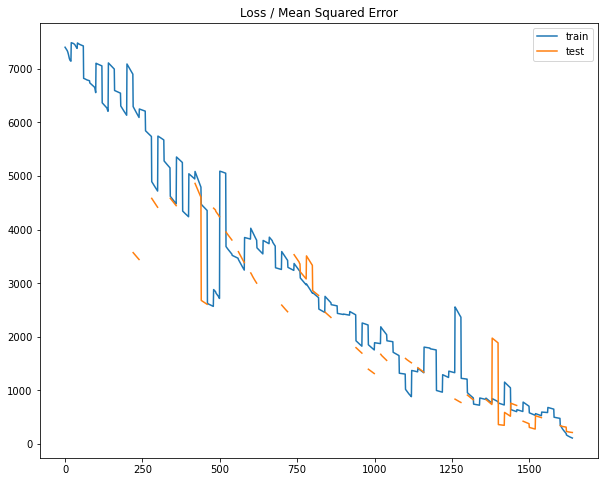

In [13]:
pyplot.figure(figsize=(10,8))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(hist_df['loss'], label='train')
pyplot.plot(hist_df['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [16]:
test

<MapDataset shapes: ((None, 20, 6), (None, 1, 2)), types: (tf.float64, tf.float64)>

In [14]:
predict = lstm_model.predict(test, verbose=0)
predict

array([[[-72.720345,  17.87779 ],
        [-89.539696,  22.207363],
        [-92.11757 ,  22.870949],
        ...,
        [-92.528435,  22.976711],
        [-92.52844 ,  22.976711],
        [-92.528435,  22.976711]],

       [[-72.72038 ,  17.8778  ],
        [-89.53972 ,  22.20737 ],
        [-92.11756 ,  22.870947],
        ...,
        [-92.52844 ,  22.976711],
        [-92.528435,  22.976711],
        [-92.528435,  22.976711]],

       [[-72.71978 ,  17.877653],
        [-89.539635,  22.207352],
        [-92.11756 ,  22.870945],
        ...,
        [-92.528435,  22.976711],
        [-92.528435,  22.976711],
        [-92.52844 ,  22.976713]],

       ...,

       [[-72.72013 ,  17.877739],
        [-89.539696,  22.207367],
        [-92.117546,  22.870943],
        ...,
        [-92.52843 ,  22.976707],
        [-92.528435,  22.976711],
        [-92.528435,  22.976711]],

       [[-72.71868 ,  17.877377],
        [-89.5395  ,  22.207314],
        [-92.11753 ,  22.870941],
        .

In [15]:
for element in test.as_numpy_iterator():
  print(element[1])

[[[ -91.252    9.525]]

 [[ -91.148    9.519]]

 [[ -91.217    9.483]]

 [[ -91.262    9.564]]

 [[ -91.095    9.455]]

 [[ -91.301    9.631]]

 [[ -91.291    9.541]]

 [[ -91.237    9.429]]

 [[ -90.974    9.368]]

 [[ -90.797    9.218]]

 [[ -90.478    9.177]]

 [[ -90.48     9.161]]

 [[ -90.47     9.014]]

 [[ -90.045    8.954]]

 [[ -90.308    9.092]]

 [[ -90.027    8.951]]

 [[ -90.206    9.189]]

 [[ -90.212    9.054]]

 [[ -90.121    9.729]]

 [[ -90.226    9.727]]

 [[ -90.57     9.532]]

 [[ -90.385    9.429]]

 [[ -90.381    9.473]]

 [[ -90.777    8.904]]

 [[ -90.478    9.675]]

 [[ -90.471    9.707]]

 [[ -90.639    9.598]]

 [[ -90.284    9.656]]

 [[ -91.981    9.32 ]]

 [[ -90.031    9.678]]

 [[ -90.1      9.783]]

 [[-104.172   13.282]]]
[[[-89.941   9.283]]

 [[-90.049   9.347]]

 [[-90.156   9.265]]

 [[-90.219   9.315]]

 [[-90.166   9.278]]

 [[-90.311   9.2  ]]

 [[-90.276   9.181]]

 [[-90.338   9.035]]

 [[-90.417   9.043]]

 [[-91.29    9.181]]

 [[-90.384  

In [30]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 32)            4992      
_________________________________________________________________
dense (Dense)                (None, 20, 2)             66        
Total params: 5,058
Trainable params: 5,058
Non-trainable params: 0
_________________________________________________________________


In [39]:
window_length = 20

x_test = tf.keras.utils.timeseries_dataset_from_array(
dfs[0][:20], targets=None,sequence_length = window_length, sequence_stride=1, sampling_rate=1,
batch_size=32, shuffle=False, seed=None, start_index=None, end_index=None)

In [40]:
x_test

<BatchDataset shapes: (None, None, 6), types: tf.float64>

In [41]:
lstm_model.predict(x_test)

array([[[-72.72091 ,  17.877968],
        [-89.539764,  22.207386],
        [-92.11759 ,  22.870955],
        [-92.472725,  22.962372],
        [-92.520905,  22.974773],
        [-92.52744 ,  22.97646 ],
        [-92.52832 ,  22.976683],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719],
        [-92.52846 ,  22.976719]]], dtype=float32)